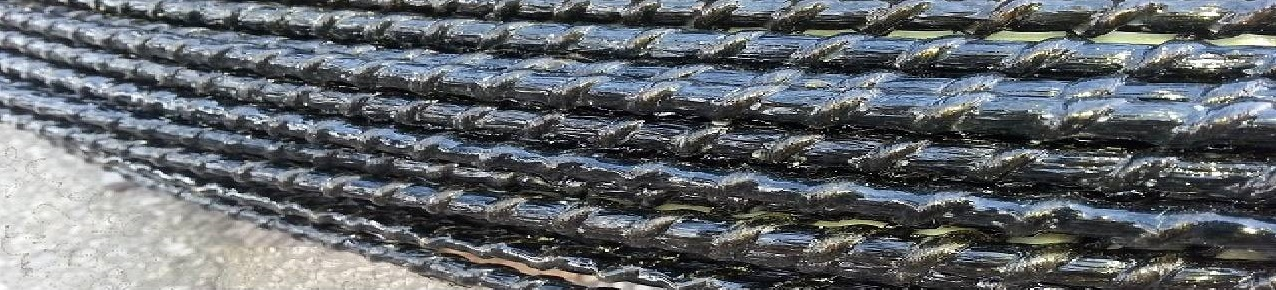

In [219]:
from IPython.display import Image
Image("C:/Users/Oksana/Desktop/композит.jpg")

Композиционные материалы — это искусственно созданные материалы, состоящие из нескольких других с четкой границей между ними. Композиты обладают теми свойствами, которые не наблюдаются у компонентов по отдельности. При этом композиты являются монолитным материалом, т. е. компоненты материала неотделимы друг от друга без разрушения конструкции в целом.

#### Этот блокнот содержит краткий исследовательский анализ  набора данных объединённого в один из "X_bp-базальтопластик" и "X_nup-углепластик"  и подборку моделей, обученных предсказывать модуль упругости при растяжении и прочности при растяжении. Так же нейронную сеть, которая будет рекомендовать соотношение матрица-наполнитель

##                                        Разведочный анализ данных 

#### Целью является выполнение краткого анализа данных и определения свойств переменных и взаимосвязей между ними.

## Очистка данных и трансформация переменных

#### Очистка данных и проектирование переменных, затем полученная информация будет использоваться  таким образом, чтобы повысить производительность моделей.

## Далее были обучены 5 моделей:

#### •Ridge regression

#### •Lasso regression

#### •GradientBoostingRegressor

#### •RandomForestRegressor

#### •Neural Network

In [220]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

#### Загрузка данных и базовое исследование

In [221]:
X_nup = pd.read_excel("C:\work\hw_data_composite\X_nup.xlsx")
X_nup.head()

Unnamed: 0  Угол нашивки, град  Шаг нашивки  Плотность нашивки
0         0.0                 0.0          4.0               57.0
1         1.0                 0.0          4.0               60.0
2         2.0                 0.0          4.0               70.0
3         3.0                 0.0          5.0               47.0
4         4.0                 0.0          5.0               57.0

In [222]:
X_bp = pd.read_excel("C:\work\hw_data_composite\X_bp.xlsx")
X_bp.head()

Unnamed: 0  Соотношение матрица-наполнитель  Плотность, кг/м3  \
0         0.0                         1.857143            2030.0   
1         1.0                         1.857143            2030.0   
2         2.0                         1.857143            2030.0   
3         3.0                         1.857143            2030.0   
4         4.0                         2.771331            2030.0   

   модуль упругости, ГПа  Количество отвердителя, м.%  \
0             738.736842                        30.00   
1             738.736842                        50.00   
2             738.736842                        49.90   
3             738.736842                       129.00   
4             753.000000                       111.86   

   Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                        22.267857                100.000000   
1                        23.750000                284.615385   
2                        33.000000                284.615385   
3                        21.250000                300.000000   
4                        22.267857                284.615385   

   Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                          210.0                                  70.0   
1                          210.0                                  70.0   
2                          210.0                                  70.0   
3                          210.0                                  70.0   
4                          210.0                                  70.0   

   Прочность при растяжении, МПа  Потребление смолы, г/м2  
0                         3000.0                    220.0  
1                         3000.0                    220.0  
2                         3000.0                    220.0  
3                         3000.0                    220.0  
4                         3000.0                    220.0

#### Объединение  по индексу тип объединения INNER

In [223]:
df=pd.merge(X_bp,X_nup, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False)
df.head()

Unnamed: 0  Соотношение матрица-наполнитель  Плотность, кг/м3  \
0         0.0                         1.857143            2030.0   
1         1.0                         1.857143            2030.0   
2         2.0                         1.857143            2030.0   
3         3.0                         1.857143            2030.0   
4         4.0                         2.771331            2030.0   

   модуль упругости, ГПа  Количество отвердителя, м.%  \
0             738.736842                        30.00   
1             738.736842                        50.00   
2             738.736842                        49.90   
3             738.736842                       129.00   
4             753.000000                       111.86   

   Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                        22.267857                100.000000   
1                        23.750000                284.615385   
2                        33.000000                284.615385   
3                        21.250000                300.000000   
4                        22.267857                284.615385   

   Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                          210.0                                  70.0   
1                          210.0                                  70.0   
2                          210.0                                  70.0   
3                          210.0                                  70.0   
4                          210.0                                  70.0   

   Прочность при растяжении, МПа  Потребление смолы, г/м2  Угол нашивки, град  \
0                         3000.0                    220.0                 0.0   
1                         3000.0                    220.0                 0.0   
2                         3000.0                    220.0                 0.0   
3                         3000.0                    220.0                 0.0   
4                         3000.0                    220.0                 0.0   

   Шаг нашивки  Плотность нашивки  
0          4.0               57.0  
1          4.0               60.0  
2          4.0               70.0  
3          5.0               47.0  
4          5.0               57.0

In [224]:
df = df.drop('Unnamed: 0', 1)# удалим не информативный столбец

C:\Users\Oksana\AppData\Local\Temp/ipykernel_12276/2922339640.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('Unnamed: 0', 1)# удалим не информативный столбец


In [225]:
df.describe()

Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                      1023.000000       1023.000000   
mean                          2.930366       1975.734888   
std                           0.913222         73.729231   
min                           0.389403       1731.764635   
25%                           2.317887       1924.155467   
50%                           2.906878       1977.621657   
75%                           3.552660       2021.374375   
max                           5.591742       2207.773481   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count            1023.000000                  1023.000000   
mean              739.923233                   110.570769   
std               330.231581                    28.295911   
min                 2.436909                    17.740275   
25%               500.047452                    92.443497   
50%               739.664328                   110.564840   
75%               961.812526                   129.730366   
max              1911.536477                   198.953207   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                      1023.000000               1023.000000   
mean                         22.244390                285.882151   
std                           2.406301                 40.943260   
min                          14.254985                100.000000   
25%                          20.608034                259.066528   
50%                          22.230744                285.896812   
75%                          23.961934                313.002106   
max                          33.000000                413.273418   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                    1023.000000                           1023.000000   
mean                      482.731833                             73.328571   
std                       281.314690                              3.118983   
min                         0.603740                             64.054061   
25%                       266.816645                             71.245018   
50%                       451.864365                             73.268805   
75%                       693.225017                             75.356612   
max                      1399.542362                             82.682051   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  \
count                    1023.000000              1023.000000   
mean                     2466.922843               218.423144   
std                       485.628006                59.735931   
min                      1036.856605                33.803026   
25%                      2135.850448               179.627520   
50%                      2459.524526               219.198882   
75%                      2767.193119               257.481724   
max                      3848.436732               414.590628   

       Угол нашивки, град  Шаг нашивки  Плотность нашивки  
count         1023.000000  1023.000000        1023.000000  
mean            44.252199     6.899222          57.153929  
std             45.015793     2.563467          12.350969  
min              0.000000     0.000000           0.000000  
25%              0.000000     5.080033          49.799212  
50%              0.000000     6.916144          57.341920  
75%             90.000000     8.586293          64.944961  
max             90.000000    14.440522         103.988901

In [226]:
df.shape

(1023, 13)

#### Проверим на пропуски 

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   float64
 11  Шаг нашивки      

In [228]:
# Пропусков нет и все переменные содержат значения float64

#### Гистограммы распределения , диаграммы размаха "ящик с усами", граффики квантиль-квантиль

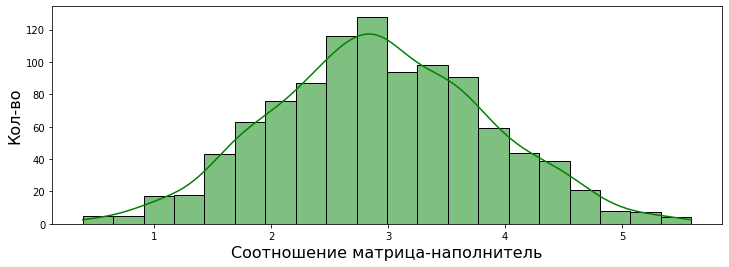

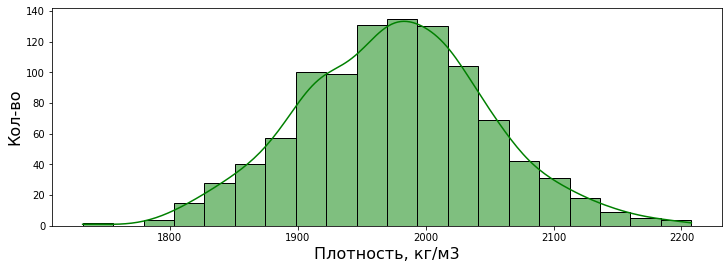

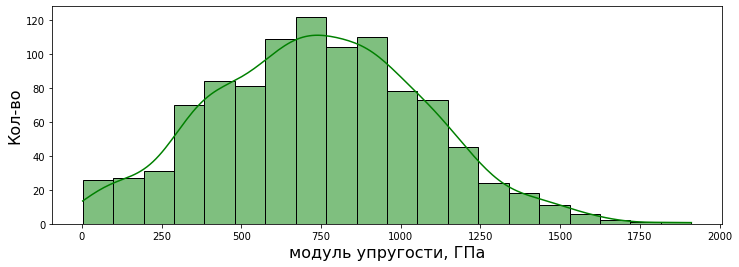

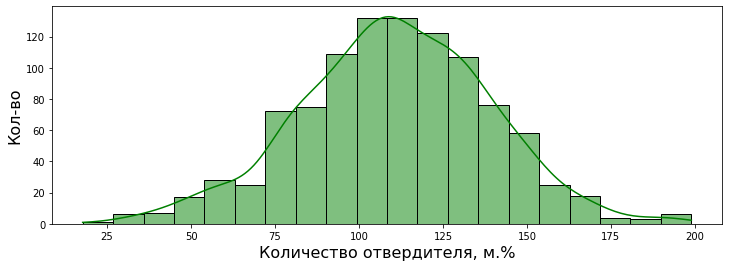

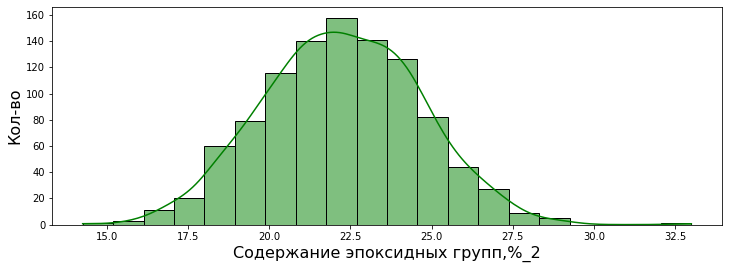

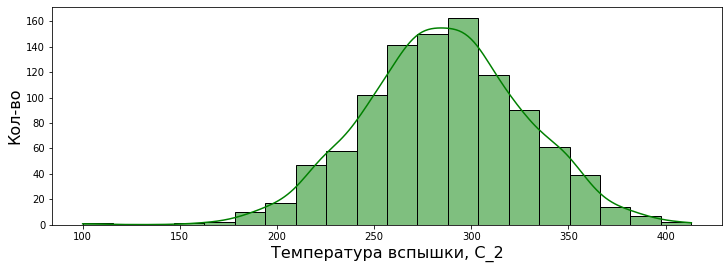

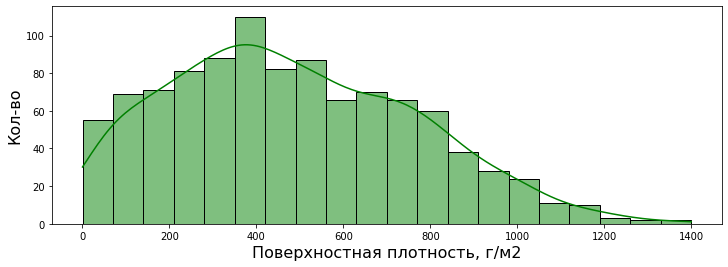

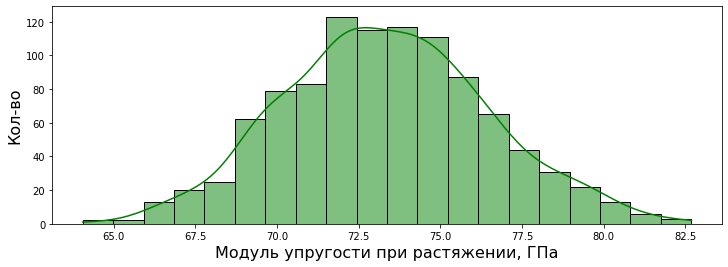

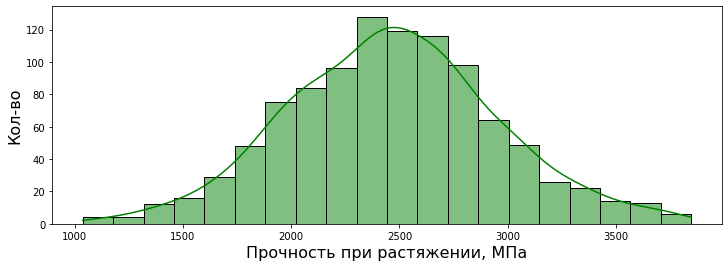

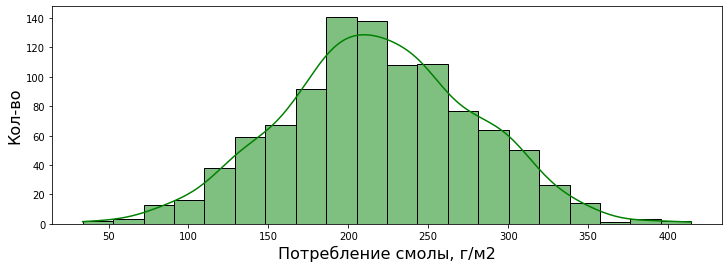

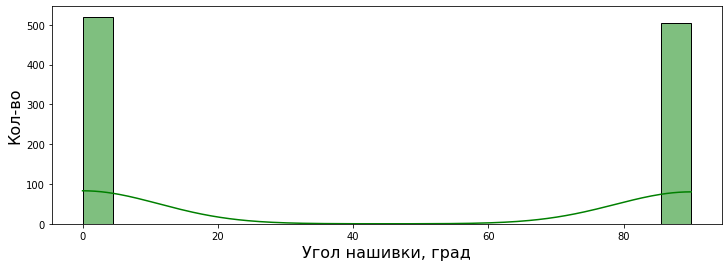

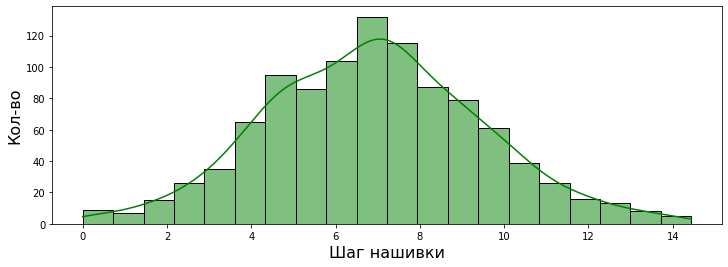

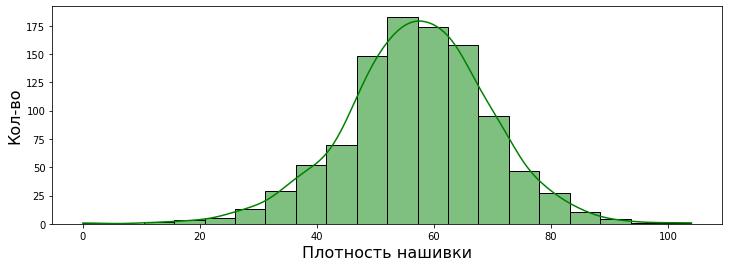

In [229]:
for col_name in df:

    
    plt.figure(figsize=(12, 4))
    sns.histplot(x=col_name, kde=True, bins=20, color = 'green',data=df)
    
    plt.xlabel(col_name, fontsize=16)
    plt.ylabel("Кол-во", fontsize=16)
    plt.show()

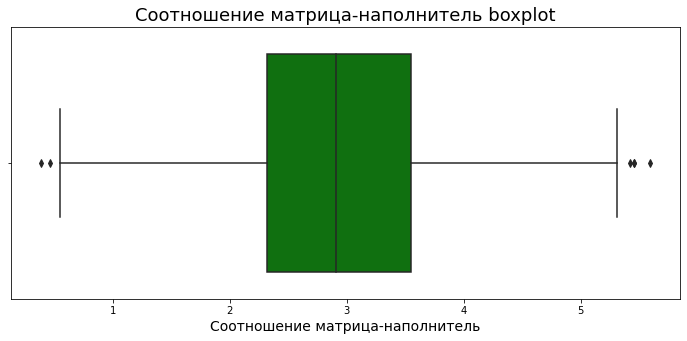

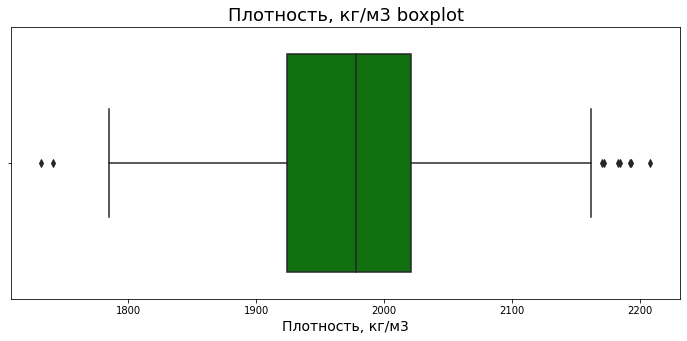

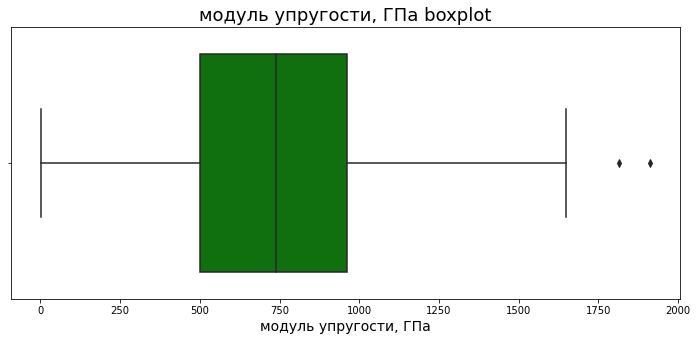

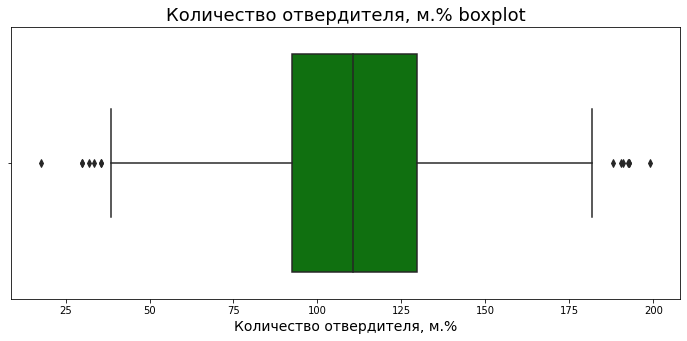

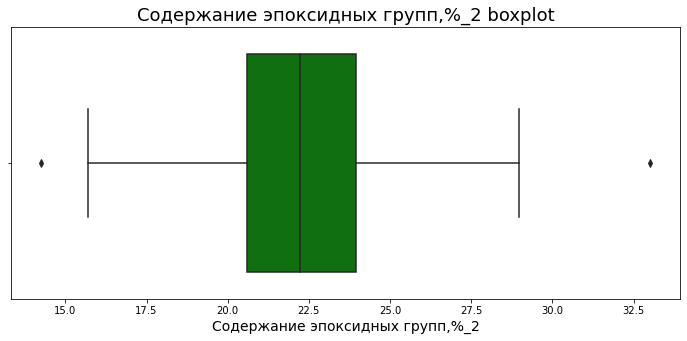

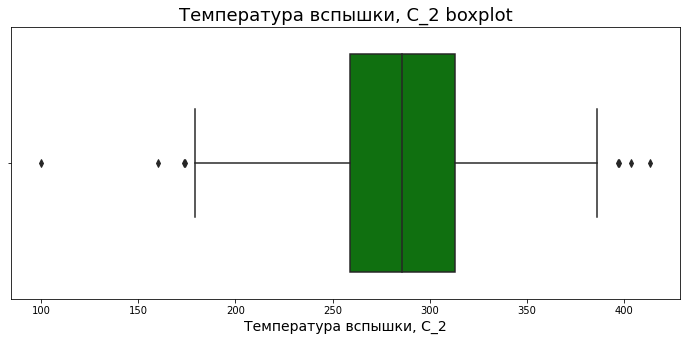

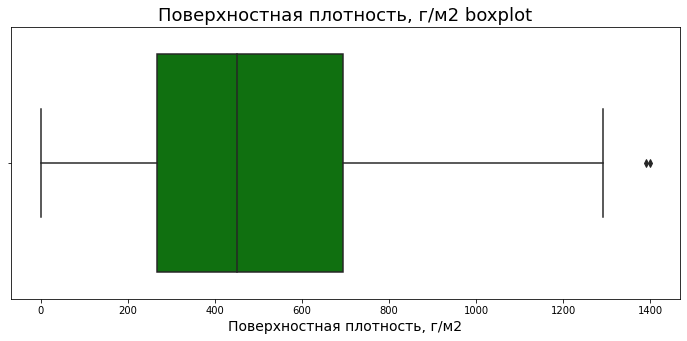

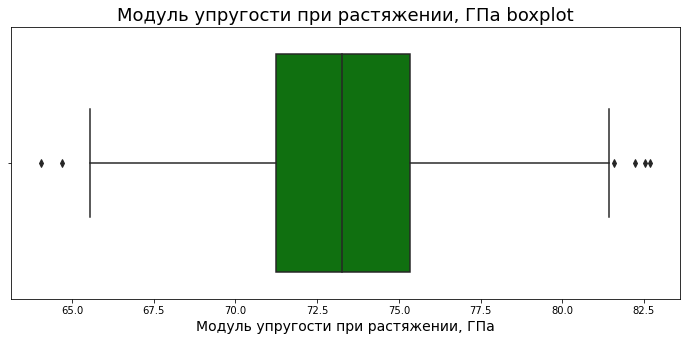

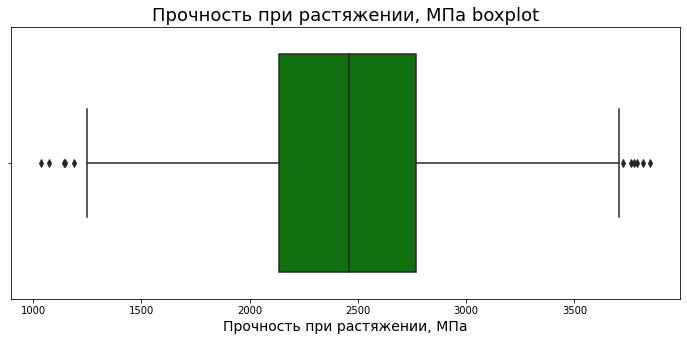

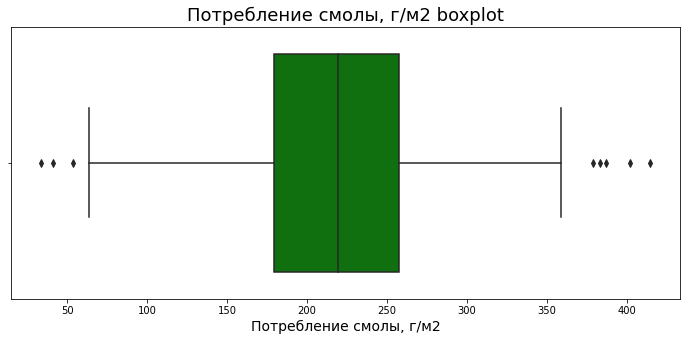

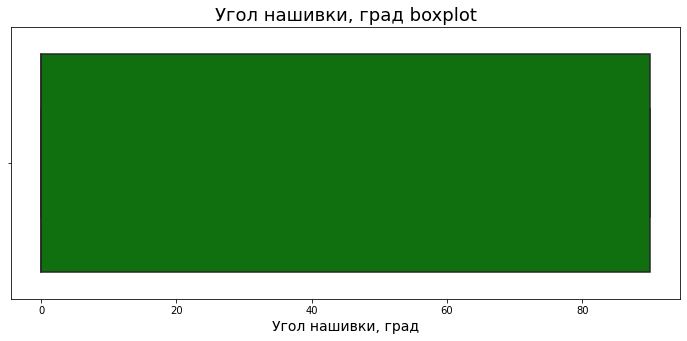

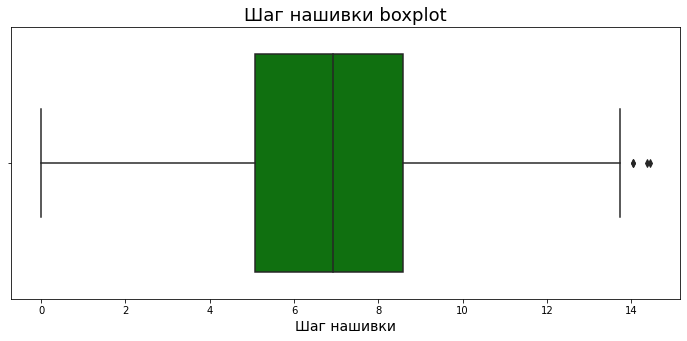

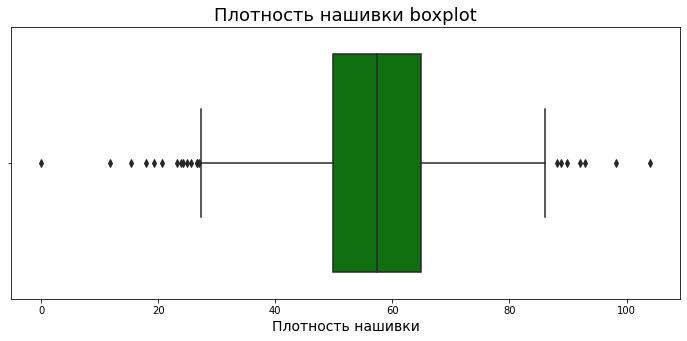

In [230]:
for col_name in df:
    plt.figure(figsize=(12, 5))
    sns.boxplot(x=df[col_name],color = 'green')
    plt.title(col_name + " boxplot", fontsize=18)
    plt.xlabel(col_name, fontsize=14)
    plt.show()

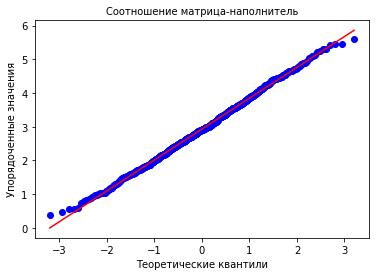

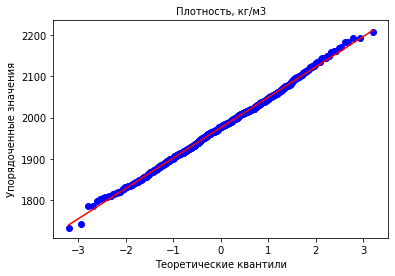

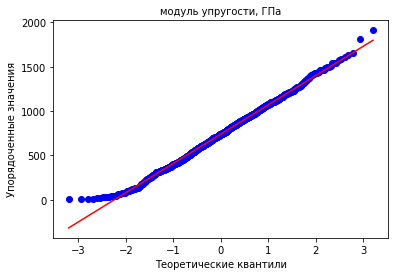

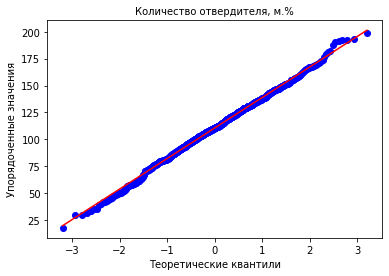

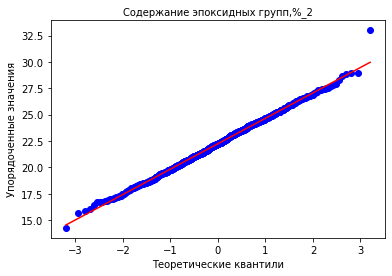

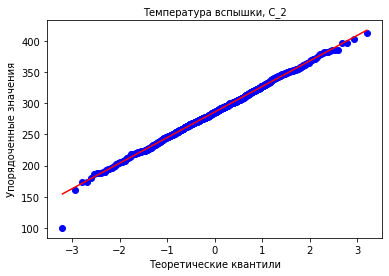

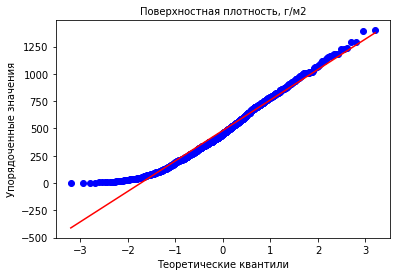

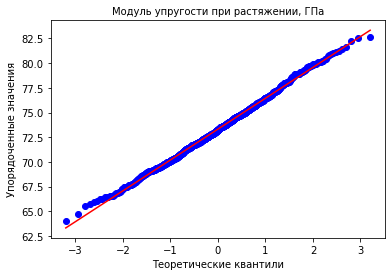

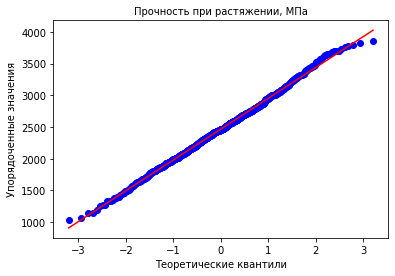

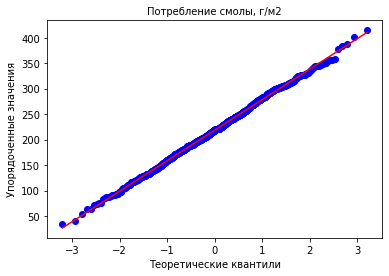

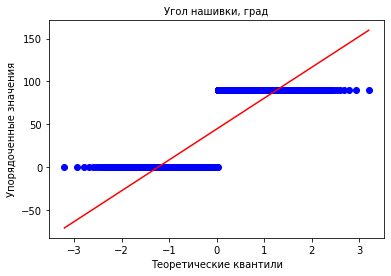

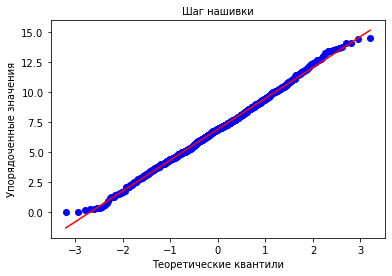

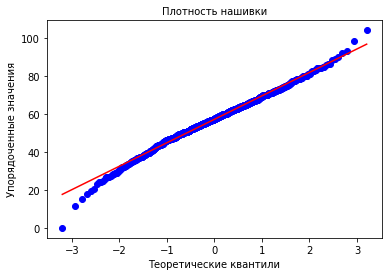

In [231]:
for i in df.columns:
    plt.figure(figsize=(6, 4))
    res = stats.probplot(df[i], plot=plt)
    plt.title(i, fontsize=10)
    plt.xlabel("Теоретические квантили", fontsize=10)
    plt.ylabel("Упорядоченные значения", fontsize=10)
    plt.show()

#### Кроме "Угол нашивки, град" и "Поверхностная плотность, г/м2" остальные переменные относительно хорошо соответствуют нормальному распределению

#### Проверим сколько уникальных значений в каждой колонке

In [232]:
df.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

In [233]:
col=['Соотношение матрица-наполнитель','Плотность, кг/м3', 'модуль упругости, ГПа', 'Количество отвердителя, м.%','Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2','Поверхностная плотность, г/м2','Модуль упругости при растяжении, ГПа','Прочность при растяжении, МПа','Потребление смолы, г/м2']
for i in col:
    df=df.drop_duplicates(subset =i)# оставим только уникальные значения в датафрейме до колонки  'Потребление смолы, г/м2'

In [234]:
df.nunique()

Соотношение матрица-наполнитель         1002
Плотность, кг/м3                        1002
модуль упругости, ГПа                   1002
Количество отвердителя, м.%             1002
Содержание эпоксидных групп,%_2         1002
Температура вспышки, С_2                1002
Поверхностная плотность, г/м2           1002
Модуль упругости при растяжении, ГПа    1002
Прочность при растяжении, МПа           1002
Потребление смолы, г/м2                 1002
Угол нашивки, град                         2
Шаг нашивки                              988
Плотность нашивки                        987
dtype: int64

### Удаление выбросов на основе межквартильного расстояния

In [235]:
col=['Соотношение матрица-наполнитель','Плотность, кг/м3', 'модуль упругости, ГПа', 'Количество отвердителя, м.%','Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2','Поверхностная плотность, г/м2','Модуль упругости при растяжении, ГПа','Прочность при растяжении, МПа','Потребление смолы, г/м2','Шаг нашивки','Плотность нашивки']
for j in col:                                                                                #Выберем колонки которые содержат выбросы
    for i in [j]:
        q_1 = df[j].quantile(0.25)
        q_3 = df[j].quantile(0.75)
        IQR = q_3 - q_1
        min=q_1 - (IQR * 1.5)
        max=q_3 + (IQR * 1.5)
        df.loc[df[i] < min,i] = np.nan
        df.loc[df[i] > max,i] = np.nan# заменим на нулевые значения

In [236]:
df = df.dropna(axis = 0)# удаляем строки с нулевыми значениями

#### Смотрим, что получилось

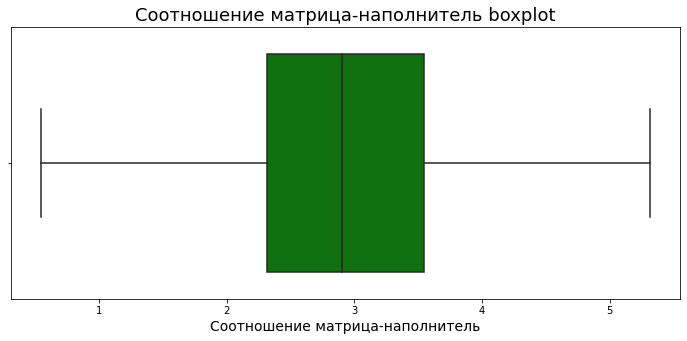

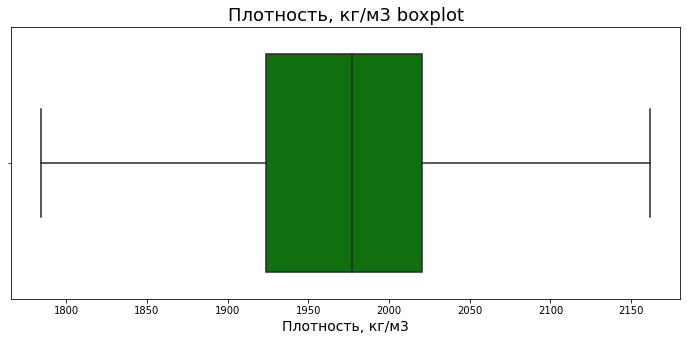

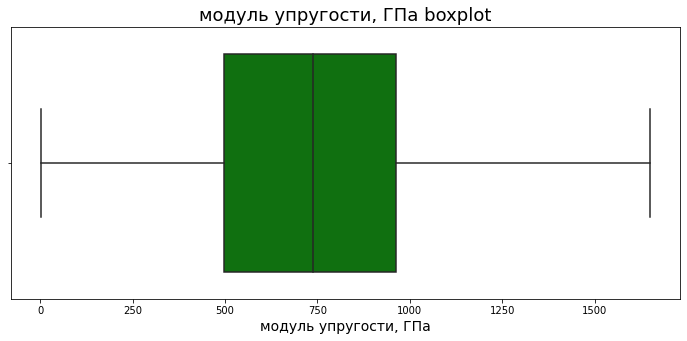

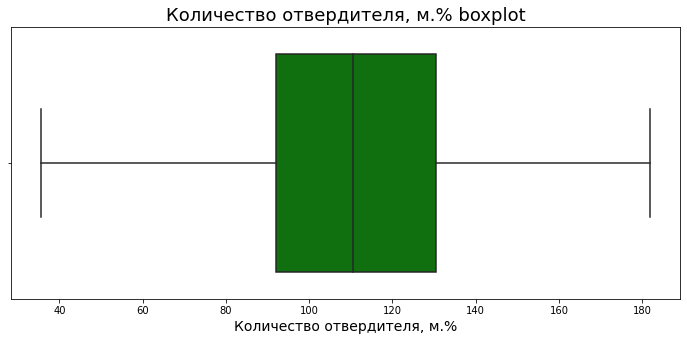

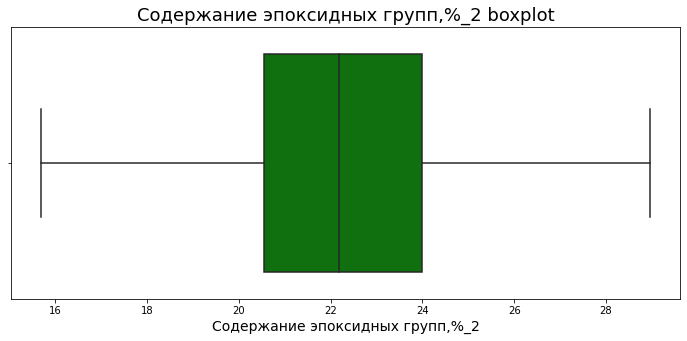

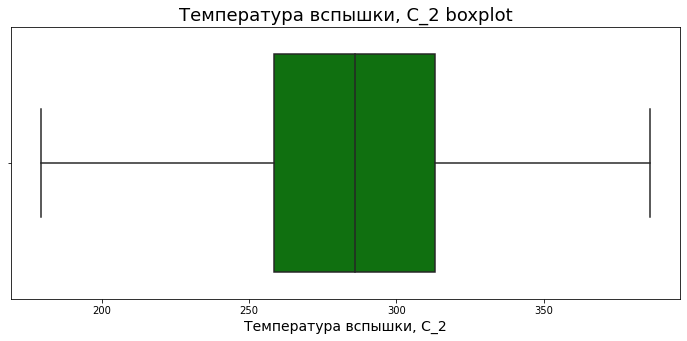

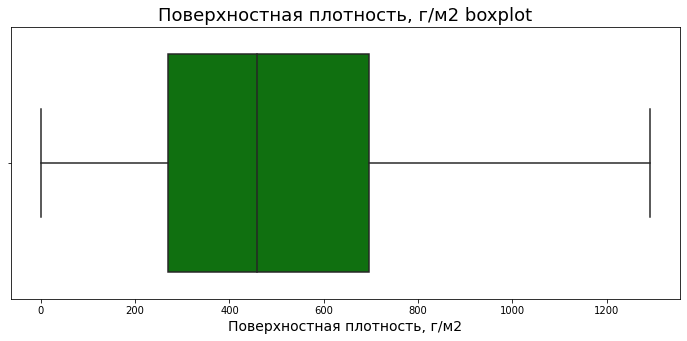

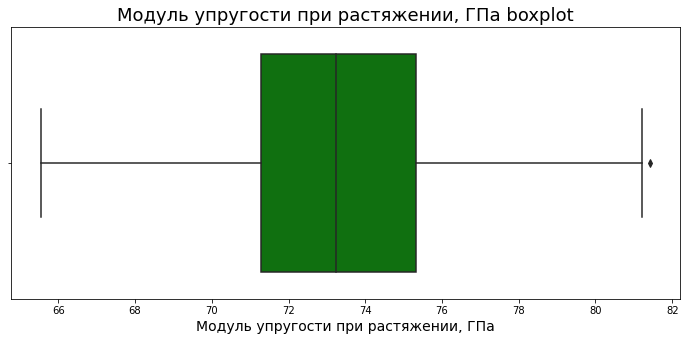

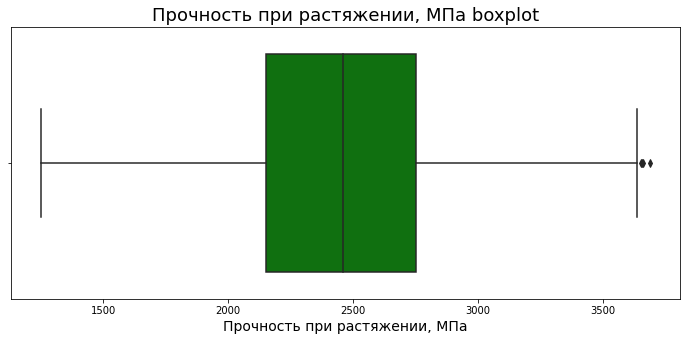

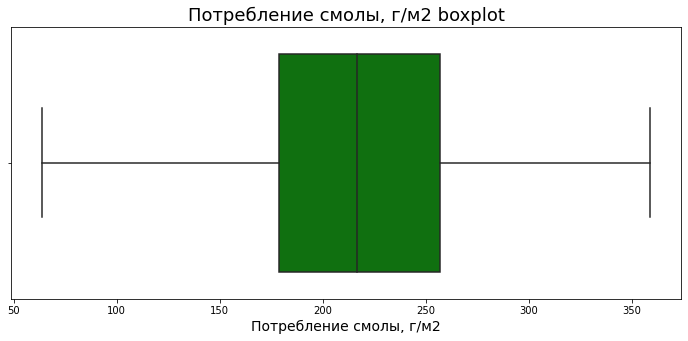

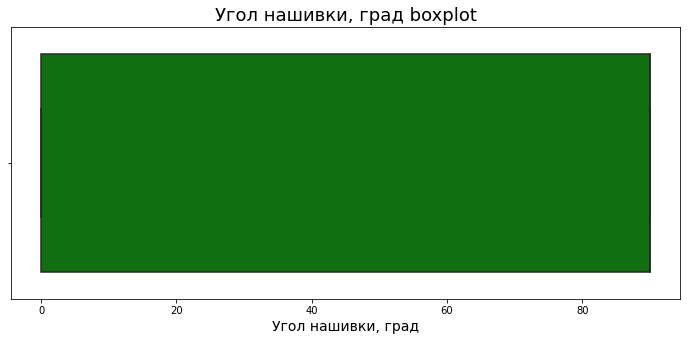

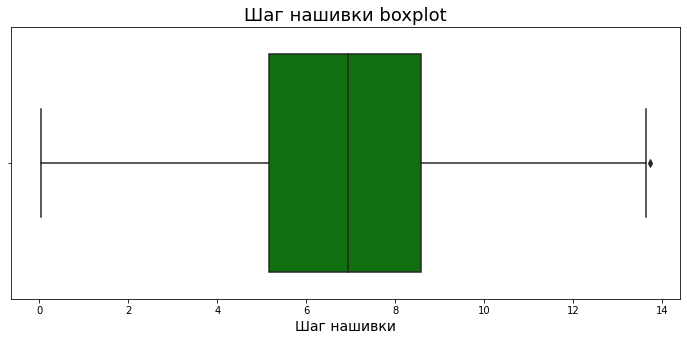

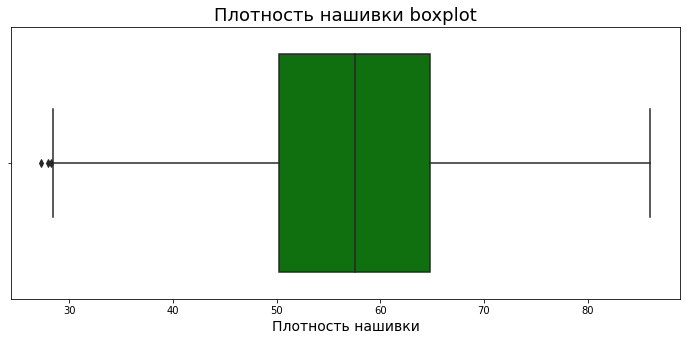

<Figure size 1800x1080 with 0 Axes>

<Figure size 1800x1080 with 0 Axes>

In [237]:
for col_name in df:
    plt.figure(figsize=(12, 5))
    sns.boxplot(x=df[col_name],color = 'green')
    plt.title(col_name + " boxplot", fontsize=18)
    plt.xlabel(col_name, fontsize=14)
    plt.show()
plt.figure(figsize=(25, 15))


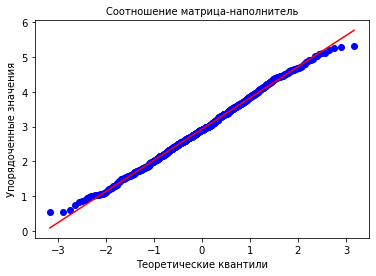

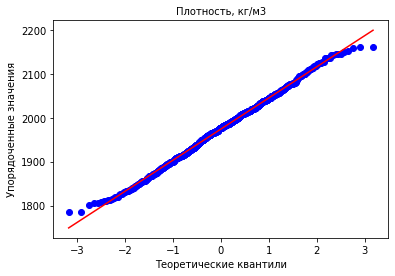

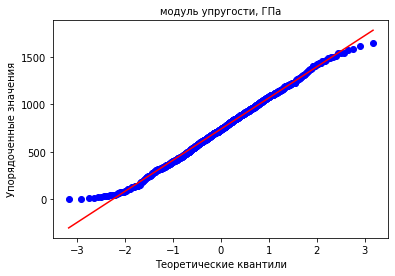

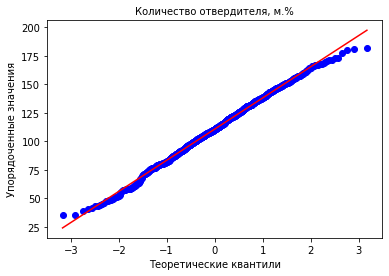

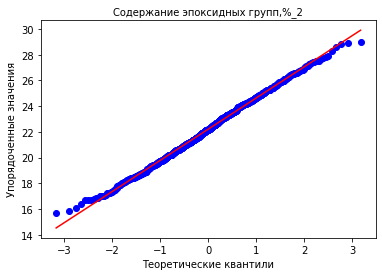

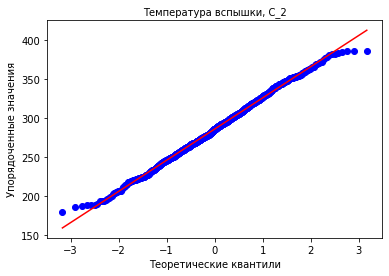

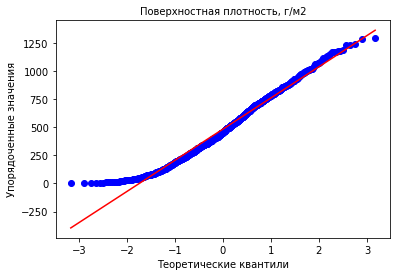

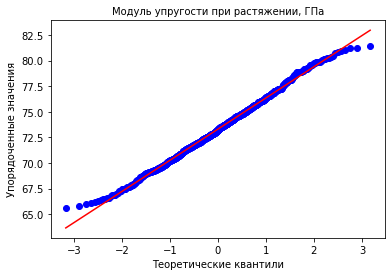

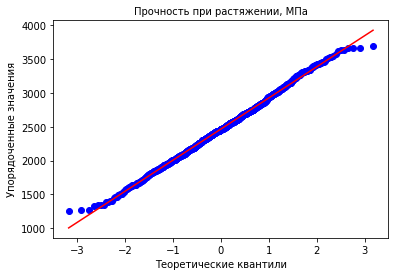

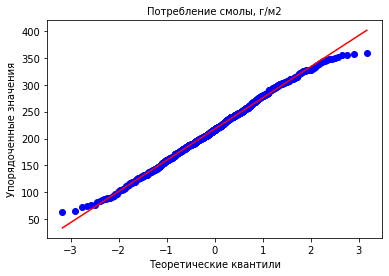

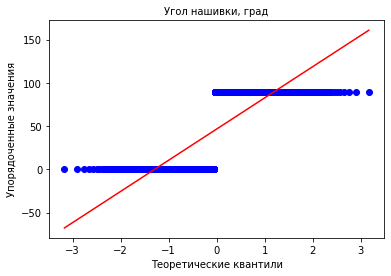

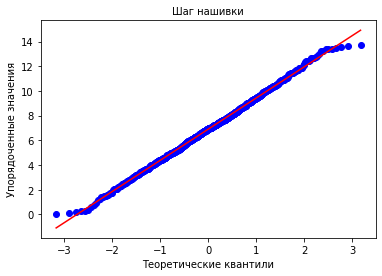

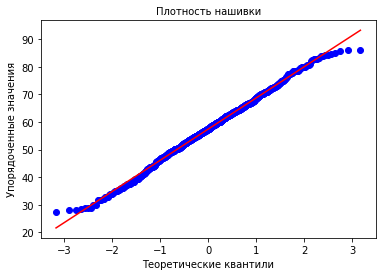

In [238]:
for i in df.columns:
    plt.figure(figsize=(6, 4))
    res = stats.probplot(df[i], plot=plt)
    plt.title(i, fontsize=10)
    plt.xlabel("Теоретические квантили", fontsize=10)
    plt.ylabel("Упорядоченные значения", fontsize=10)
    plt.show()

##### QQ-график подтверждает наши предыдущие выводы: кроме Stripe_angle все переменные относительно хорошо соответствуют нормальному распределению

## Корреляционная тепловая карта Пирсона

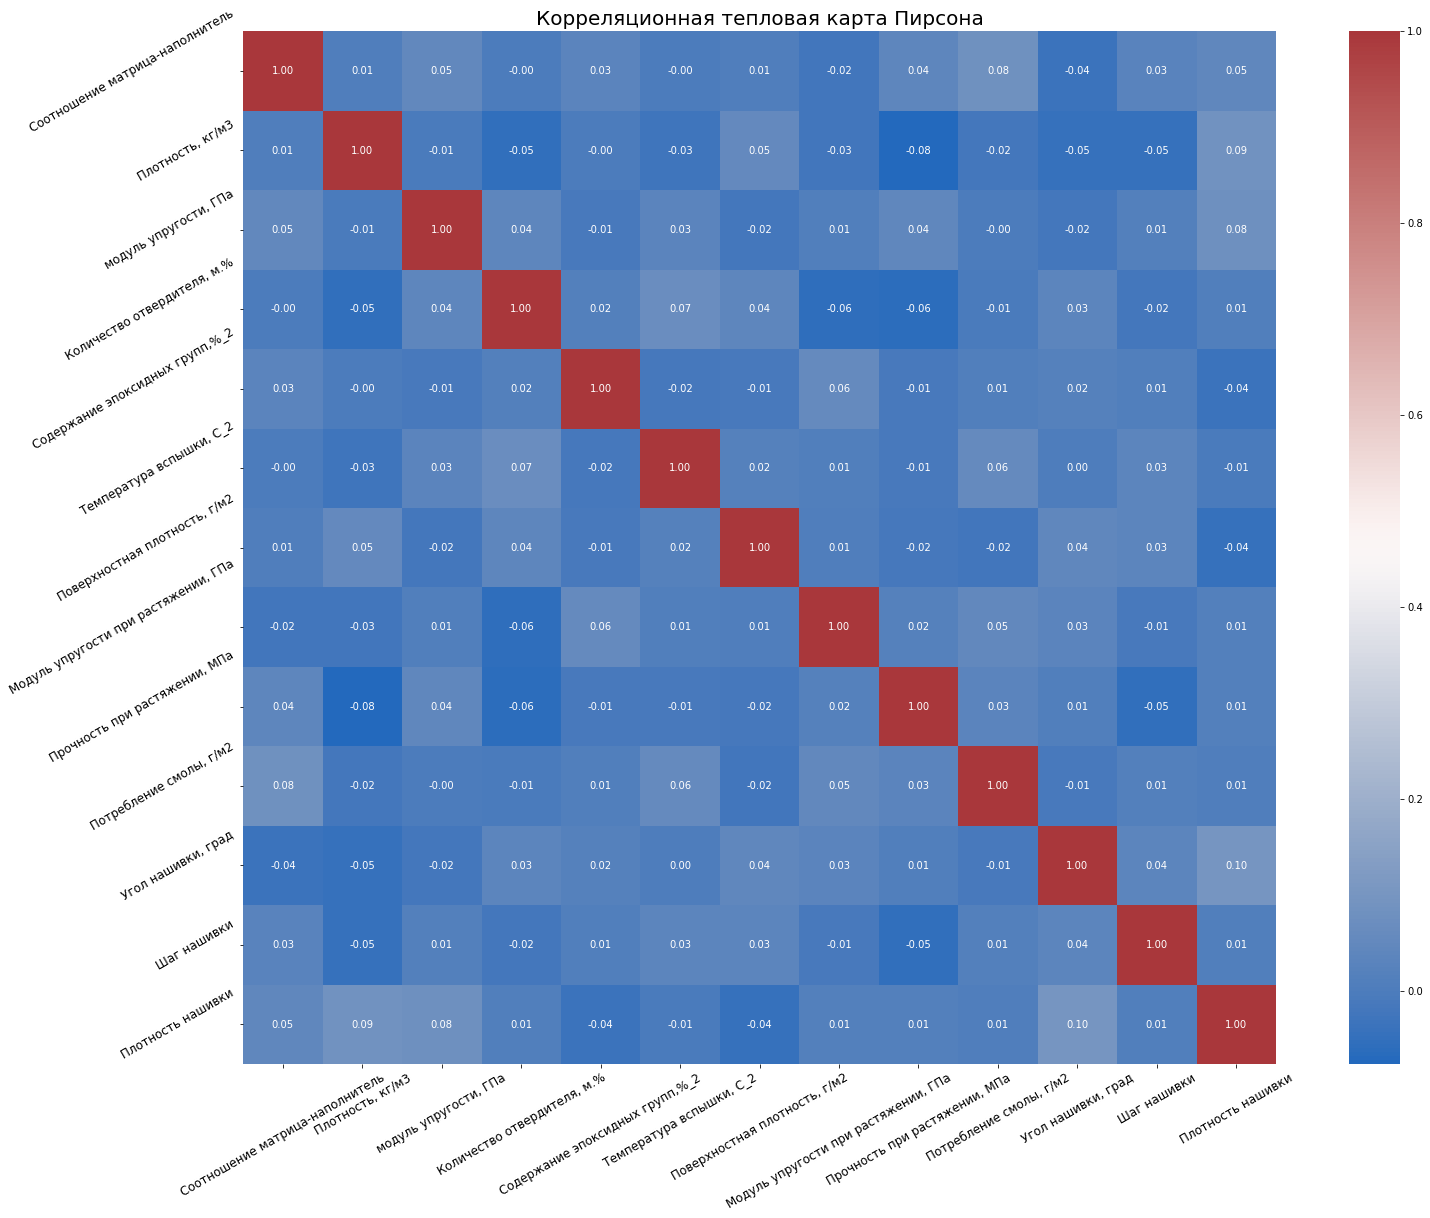

In [239]:
correlations = df.corr()
plt.figure(figsize=(26, 19))
ax = sns.heatmap(correlations, square=True, annot=True,
                 fmt='.2f', linecolor='white', cmap="vlag")
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30, fontsize=12)
plt.title("Корреляционная тепловая карта Пирсона", fontsize=20)
plt.show()

In [240]:
df.skew()#ассиметрия по всем колонкам

Соотношение матрица-наполнитель         0.054840
Плотность, кг/м3                       -0.016891
модуль упругости, ГПа                   0.058620
Количество отвердителя, м.%            -0.112077
Содержание эпоксидных групп,%_2         0.018987
Температура вспышки, С_2                0.018837
Поверхностная плотность, г/м2           0.345363
Модуль упругости при растяжении, ГПа    0.108337
Прочность при растяжении, МПа           0.073273
Потребление смолы, г/м2                -0.023239
Угол нашивки, град                     -0.070026
Шаг нашивки                             0.049236
Плотность нашивки                      -0.076306
dtype: float64

In [241]:
df.kurt()# эксцесс по всем колонкам

Соотношение матрица-наполнитель        -0.313545
Плотность, кг/м3                       -0.229165
модуль упругости, ГПа                  -0.389160
Количество отвердителя, м.%            -0.246045
Содержание эпоксидных групп,%_2        -0.368626
Температура вспышки, С_2               -0.357682
Поверхностная плотность, г/м2          -0.536285
Модуль упругости при растяжении, ГПа   -0.277541
Прочность при растяжении, МПа          -0.177320
Потребление смолы, г/м2                -0.390370
Угол нашивки, град                     -1.999467
Шаг нашивки                            -0.098360
Плотность нашивки                      -0.156874
dtype: float64

#### Попарные графики рассеяния точек

<Figure size 1152x1152 with 0 Axes>

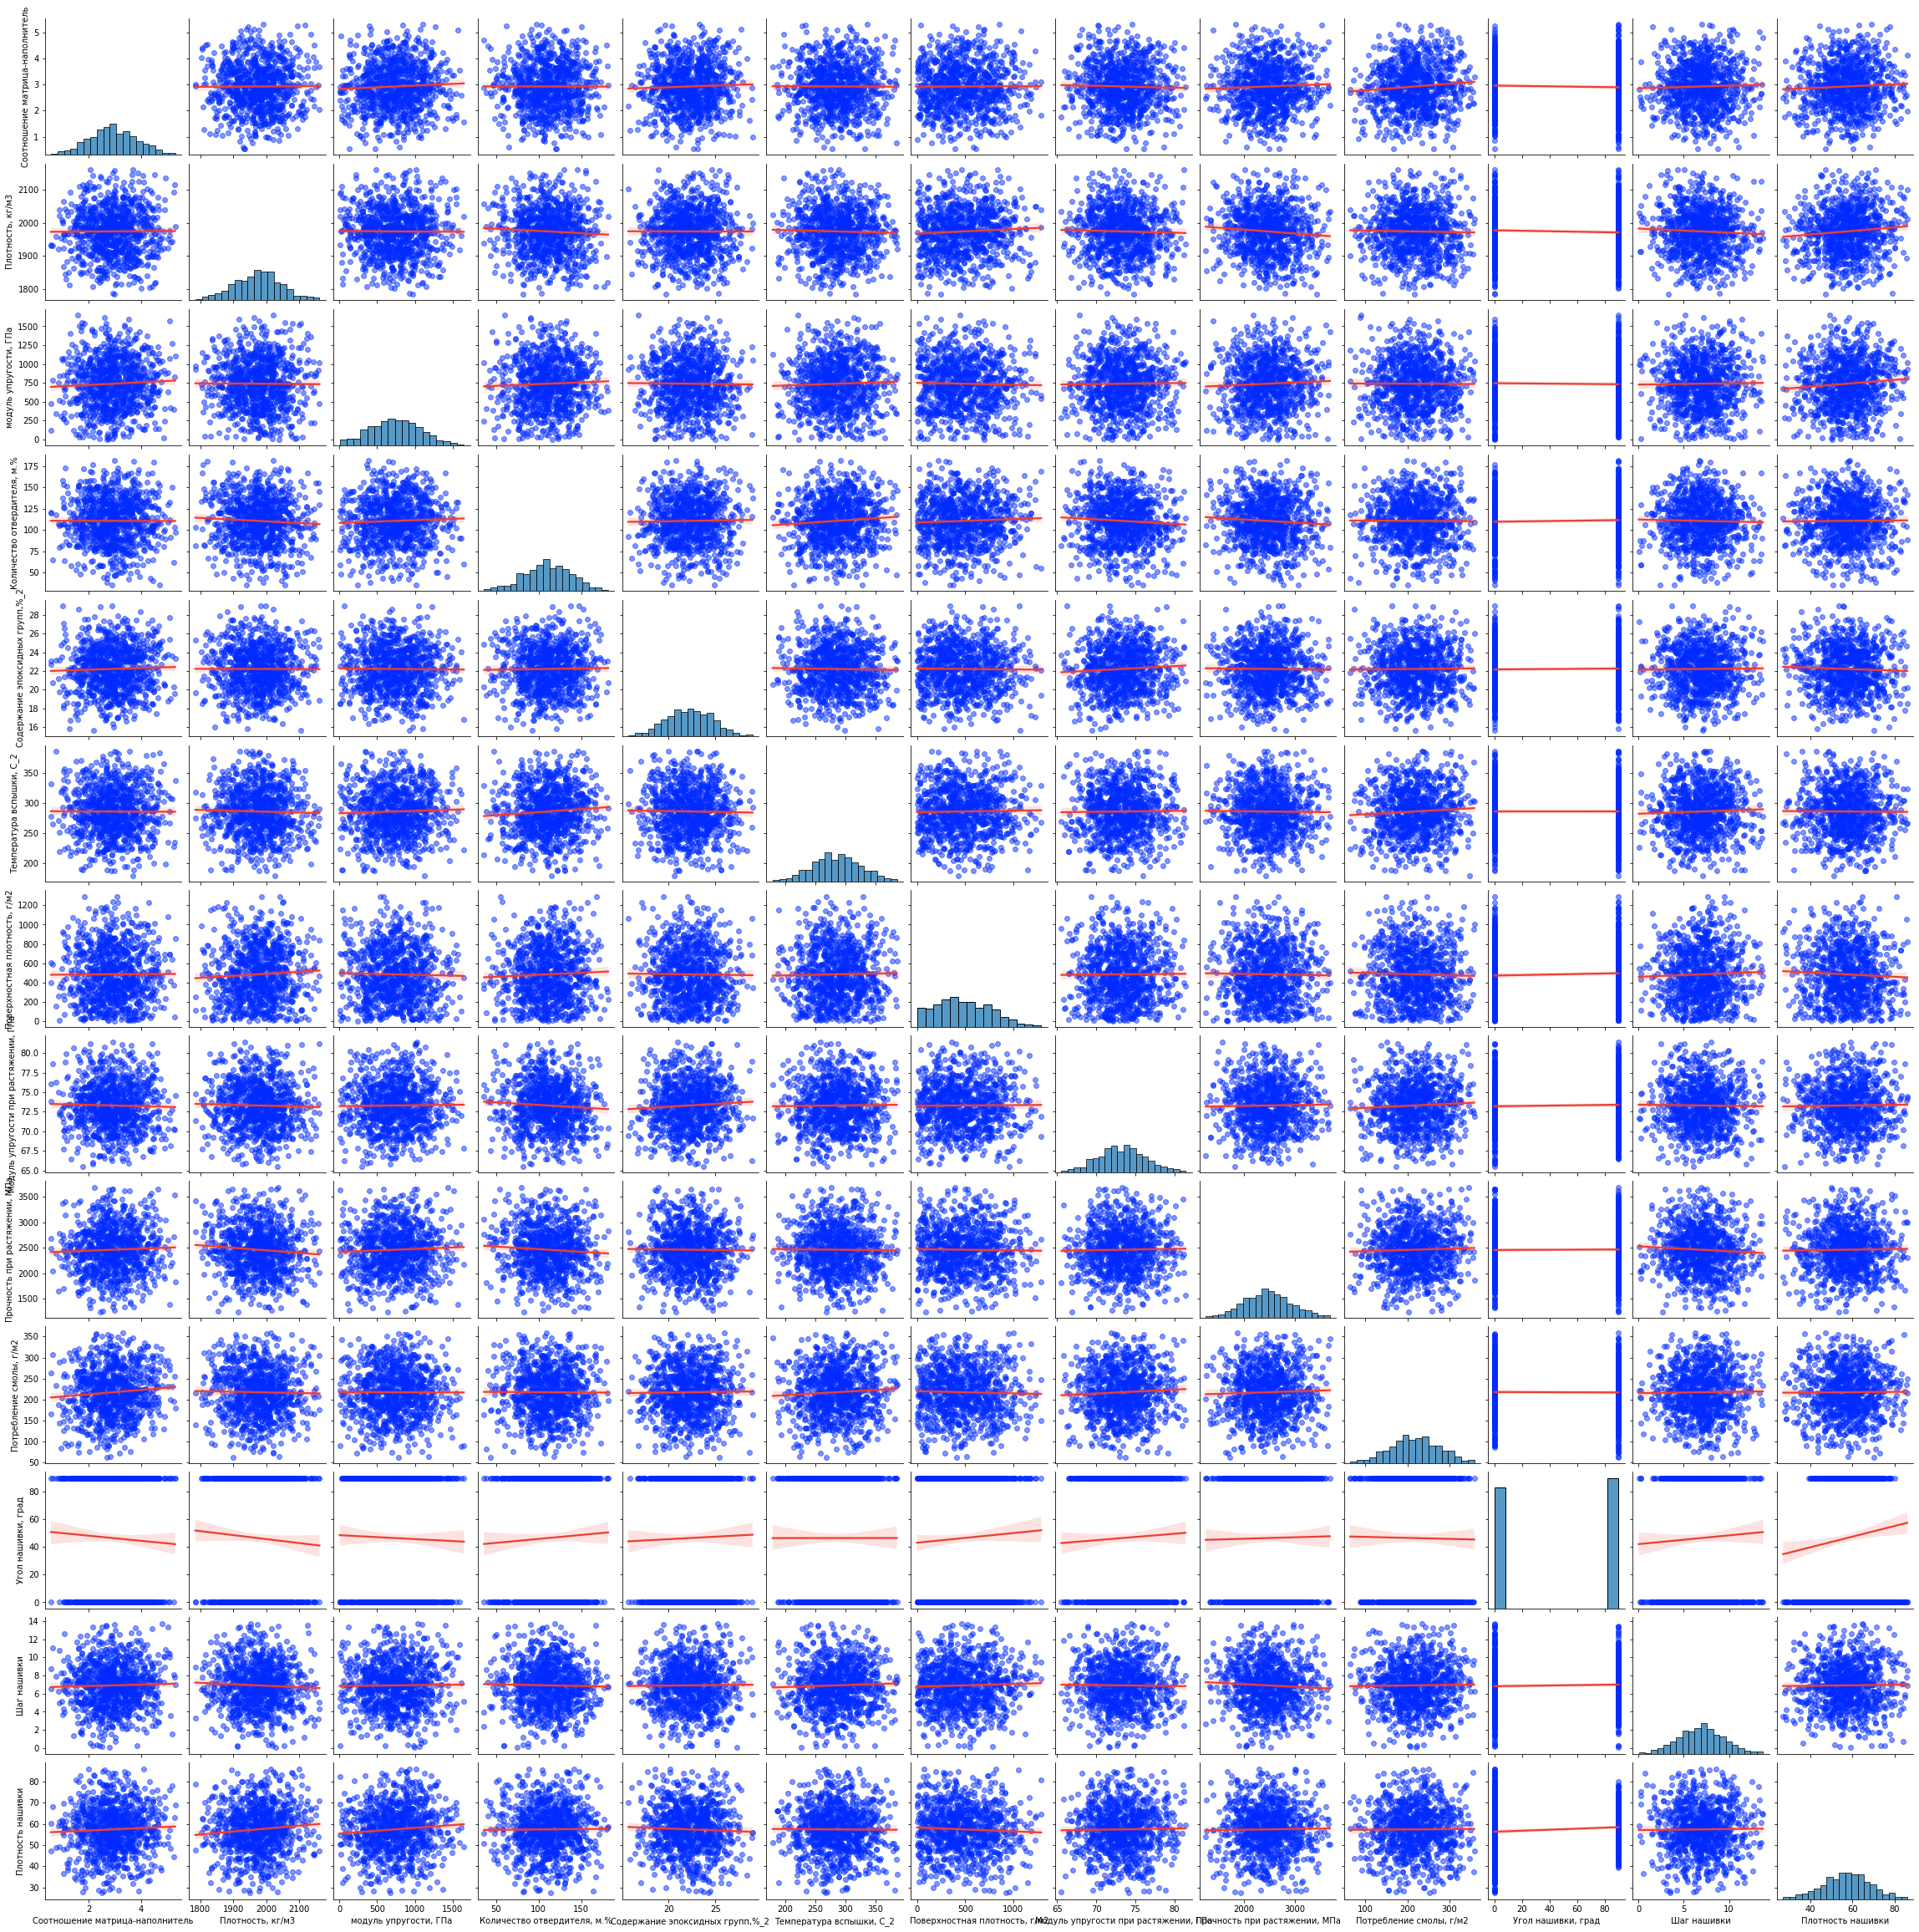

In [242]:
df_top_corr = df[['Соотношение матрица-наполнитель','Плотность, кг/м3', 'модуль упругости, ГПа', 'Количество отвердителя, м.%','Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2','Поверхностная плотность, г/м2','Модуль упругости при растяжении, ГПа','Прочность при растяжении, МПа','Потребление смолы, г/м2','Угол нашивки, град','Шаг нашивки','Плотность нашивки']]
plt.figure(figsize=(16, 16))
sns.pairplot(df_top_corr, kind='reg', diag_kind='hist', plot_kws={'line_kws': {'color': '#eb4034'},
                                                                  'scatter_kws': {'alpha': 0.5,
                                                                                  'color': '#002aff'}})
plt.show()

In [243]:
#### Корреляции нет

### Основная статистическая информация

In [244]:
df.describe()

Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                       916.000000        916.000000   
mean                          2.927166       1974.126318   
std                           0.896200         70.805900   
min                           0.547391       1784.482245   
25%                           2.319283       1923.713503   
50%                           2.906270       1977.321002   
75%                           3.548025       2020.158764   
max                           5.314144       2161.565216   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count             916.000000                   916.000000   
mean              738.629013                   110.646640   
std               328.930111                    27.285447   
min                 2.436909                    35.599697   
25%               498.438068                    91.918258   
50%               738.275026                   110.438871   
75%               962.851423                   130.457966   
max              1649.415706                   181.828448   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                       916.000000                916.000000   
mean                         22.215999                285.740600   
std                           2.419511                 39.818633   
min                          15.695894                179.374391   
25%                          20.540490                258.539199   
50%                          22.184713                285.853960   
75%                          23.982115                313.186864   
max                          28.955094                386.067992   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                     916.000000                            916.000000   
mean                      483.268410                             73.305987   
std                       279.294096                              3.039358   
min                         0.603740                             65.553336   
25%                       268.717312                             71.291137   
50%                       457.732246                             73.247594   
75%                       695.900862                             75.314494   
max                      1291.340115                             81.417126   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  \
count                     916.000000               916.000000   
mean                     2464.669593               217.587886   
std                       459.111175                57.807551   
min                      1250.392802                63.685698   
25%                      2150.615297               179.041257   
50%                      2461.020408               216.691628   
75%                      2751.815744               256.749159   
max                      3689.223681               359.052220   

       Угол нашивки, град  Шаг нашивки  Плотность нашивки  
count          916.000000   916.000000         916.000000  
mean            46.572052     6.912486          57.419622  
std             44.997101     2.517394          11.286994  
min              0.000000     0.037639          27.272928  
25%              0.000000     5.155437          50.217314  
50%             90.000000     6.938000          57.546947  
75%             90.000000     8.585130          64.798211  
max             90.000000    13.732404          86.012427

## Разработка признаков и трансформация существующих

#### Общий вес переменных. Суммарный вес всех компонентов в каждом материале отличается, и эта разница может повлиять на выходные переменные, поэтому был создан новый столбец "Тотал" 

In [245]:
df["Тотал"] = df.apply(lambda x: sum([x["Соотношение матрица-наполнитель"], x["Плотность, кг/м3"], x["модуль упругости, ГПа"],
                              x["Количество отвердителя, м.%"], x["Содержание эпоксидных групп,%_2"], x["Температура вспышки, С_2"], x["Поверхностная плотность, г/м2"], x["Модуль упругости при растяжении, ГПа"], x["Прочность при растяжении, МПа"], x["Потребление смолы, г/м2"], x["Угол нашивки, град"], x["Шаг нашивки"], x["Плотность нашивки"]]), axis=1)

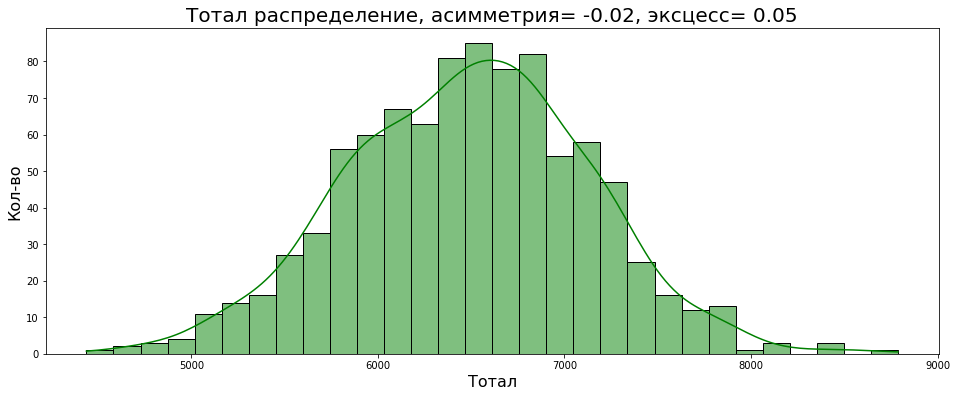

In [246]:
skewness = round(df['Тотал'].skew(), 2)
kurtosis = round(df['Тотал'].kurt(), 2)

plt.figure(figsize=(16, 6))
sns.histplot(x='Тотал',kde=True, bins=30,color = 'green', data=df)
plt.title("Тотал распределение, асимметрия= " + str(skewness) +
          ", эксцесс= " + str(kurtosis), fontsize=20)
plt.xlabel('Тотал', fontsize=16)
plt.ylabel("Кол-во", fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

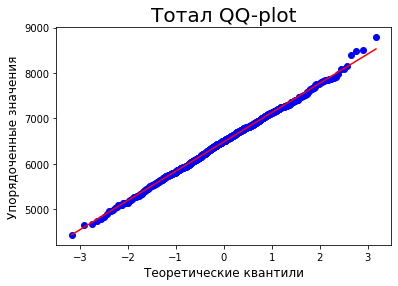

In [247]:
plt.figure(figsize=(6, 4))
res = stats.probplot(df['Тотал'], plot=plt)
plt.title("Тотал QQ-plot", fontsize=20)
plt.xlabel("Теоретические квантили", fontsize=12)
plt.ylabel("Упорядоченные значения", fontsize=12)
plt.show()

##### Поскольку совокупная плотность компонентов меняется, меняется и их отношение плотности каждого компонента к общей плотности. Поэтому я собираюсь трансформировать каждую переменную, которая содержит информацию о его плотности, выраженной в долях.

In [248]:
weight_vars = ['Соотношение матрица-наполнитель','Плотность, кг/м3', 'модуль упругости, ГПа', 'Количество отвердителя, м.%','Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2','Поверхностная плотность, г/м2','Модуль упругости при растяжении, ГПа','Прочность при растяжении, МПа','Потребление смолы, г/м2','Угол нашивки, град','Шаг нашивки','Плотность нашивки']
df_2 = df.copy()
for var in weight_vars:
    df_2[var + " %"] = df_2.apply(lambda x: (x[var]/x['Тотал'])*10000, axis=1)##масштаб увеличен в 10000 раз(трансформированные переменные умножены на одно и тоже чило)

#### Теперь после добавления новых переменных посмотрим на корреляционную тепловую карту

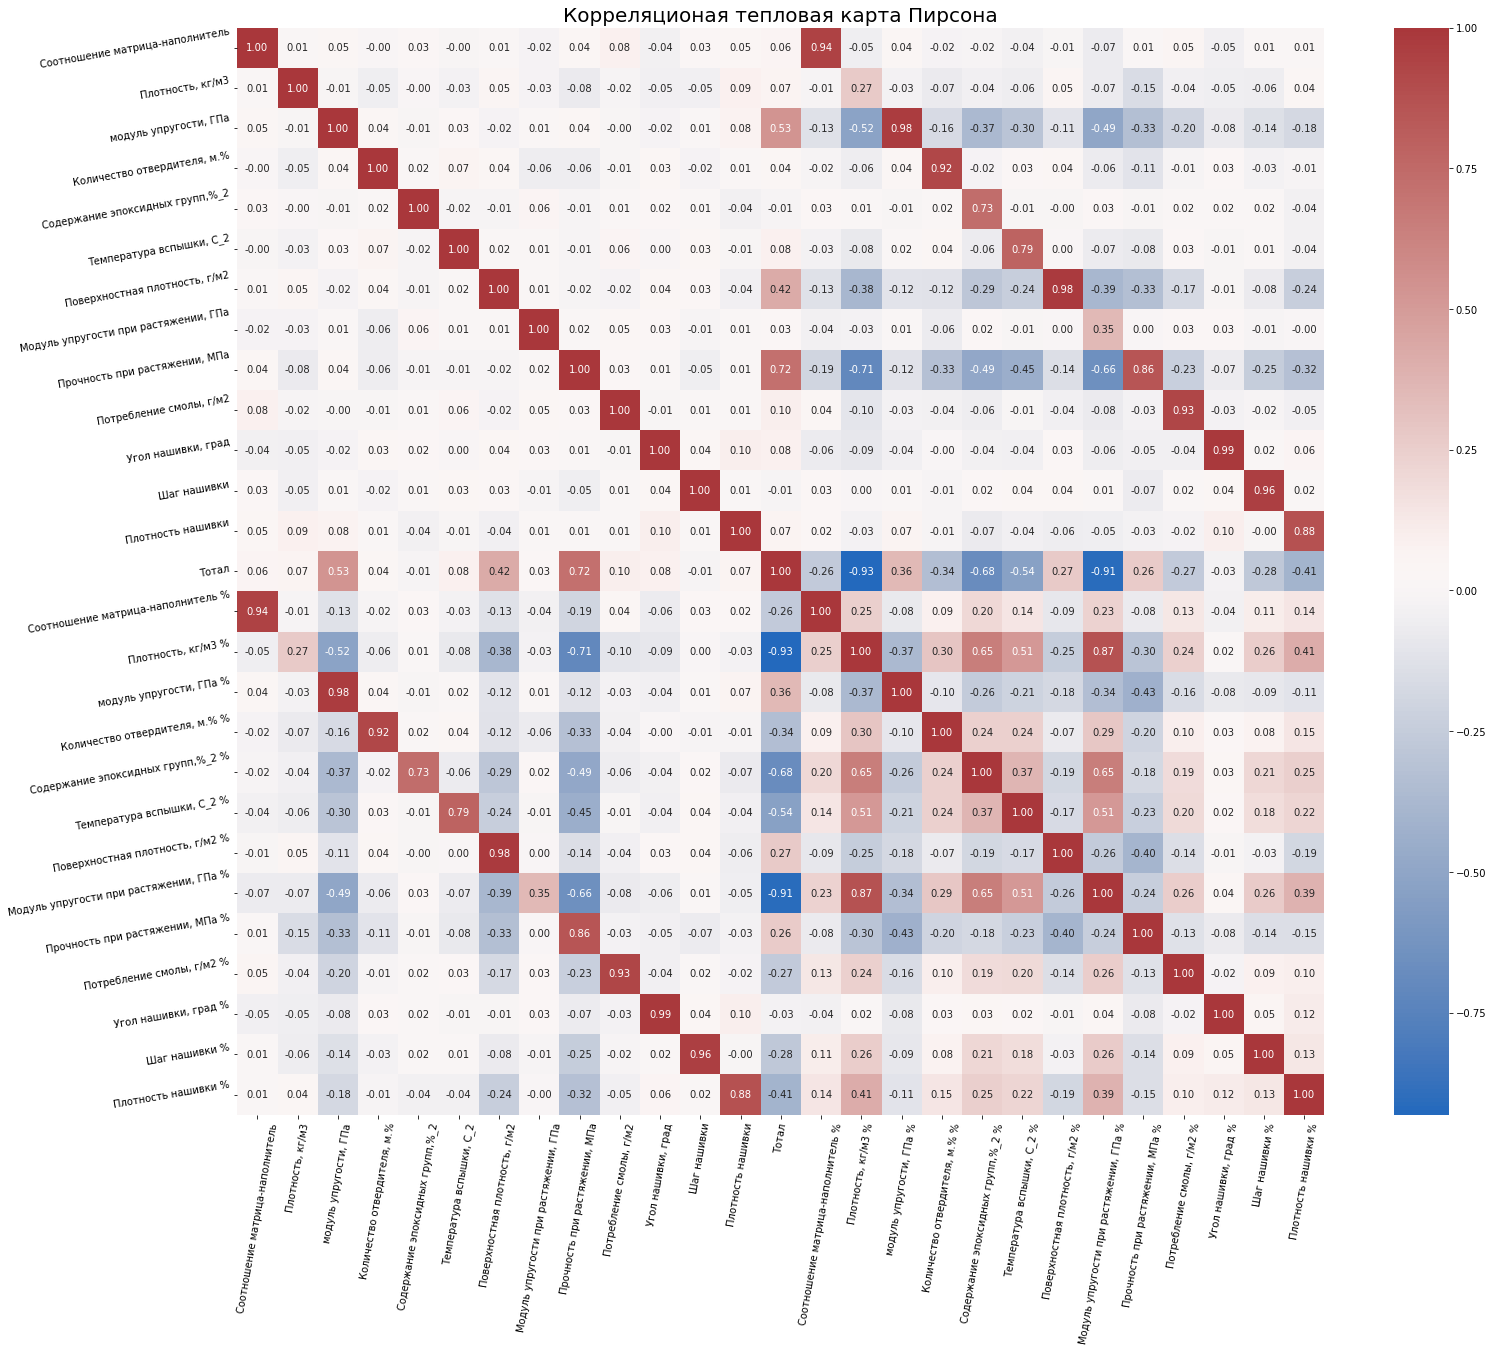

In [249]:
correlations = df_2.corr()
plt.figure(figsize=(25, 20))
ax = sns.heatmap(correlations, square=True, annot=True,
                 fmt='.2f', linecolor='white', cmap="vlag")
ax.set_xticklabels(ax.get_xticklabels(), rotation=80, fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), rotation=10, fontsize=10)
plt.title("Корреляционая тепловая карта Пирсона", fontsize=20)
plt.show()

In [250]:
#Оставим новый трансформированный датафрейм
df_actual= df_2.drop(['Соотношение матрица-наполнитель','Плотность, кг/м3', 'модуль упругости, ГПа', 'Количество отвердителя, м.%','Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2','Поверхностная плотность, г/м2','Модуль упругости при растяжении, ГПа','Прочность при растяжении, МПа','Потребление смолы, г/м2','Угол нашивки, град','Шаг нашивки','Плотность нашивки'], axis=1)

#### Корреляционная карта и диаграмма рассеивания нового трансформированного датафрейма

<Figure size 1080x1080 with 0 Axes>

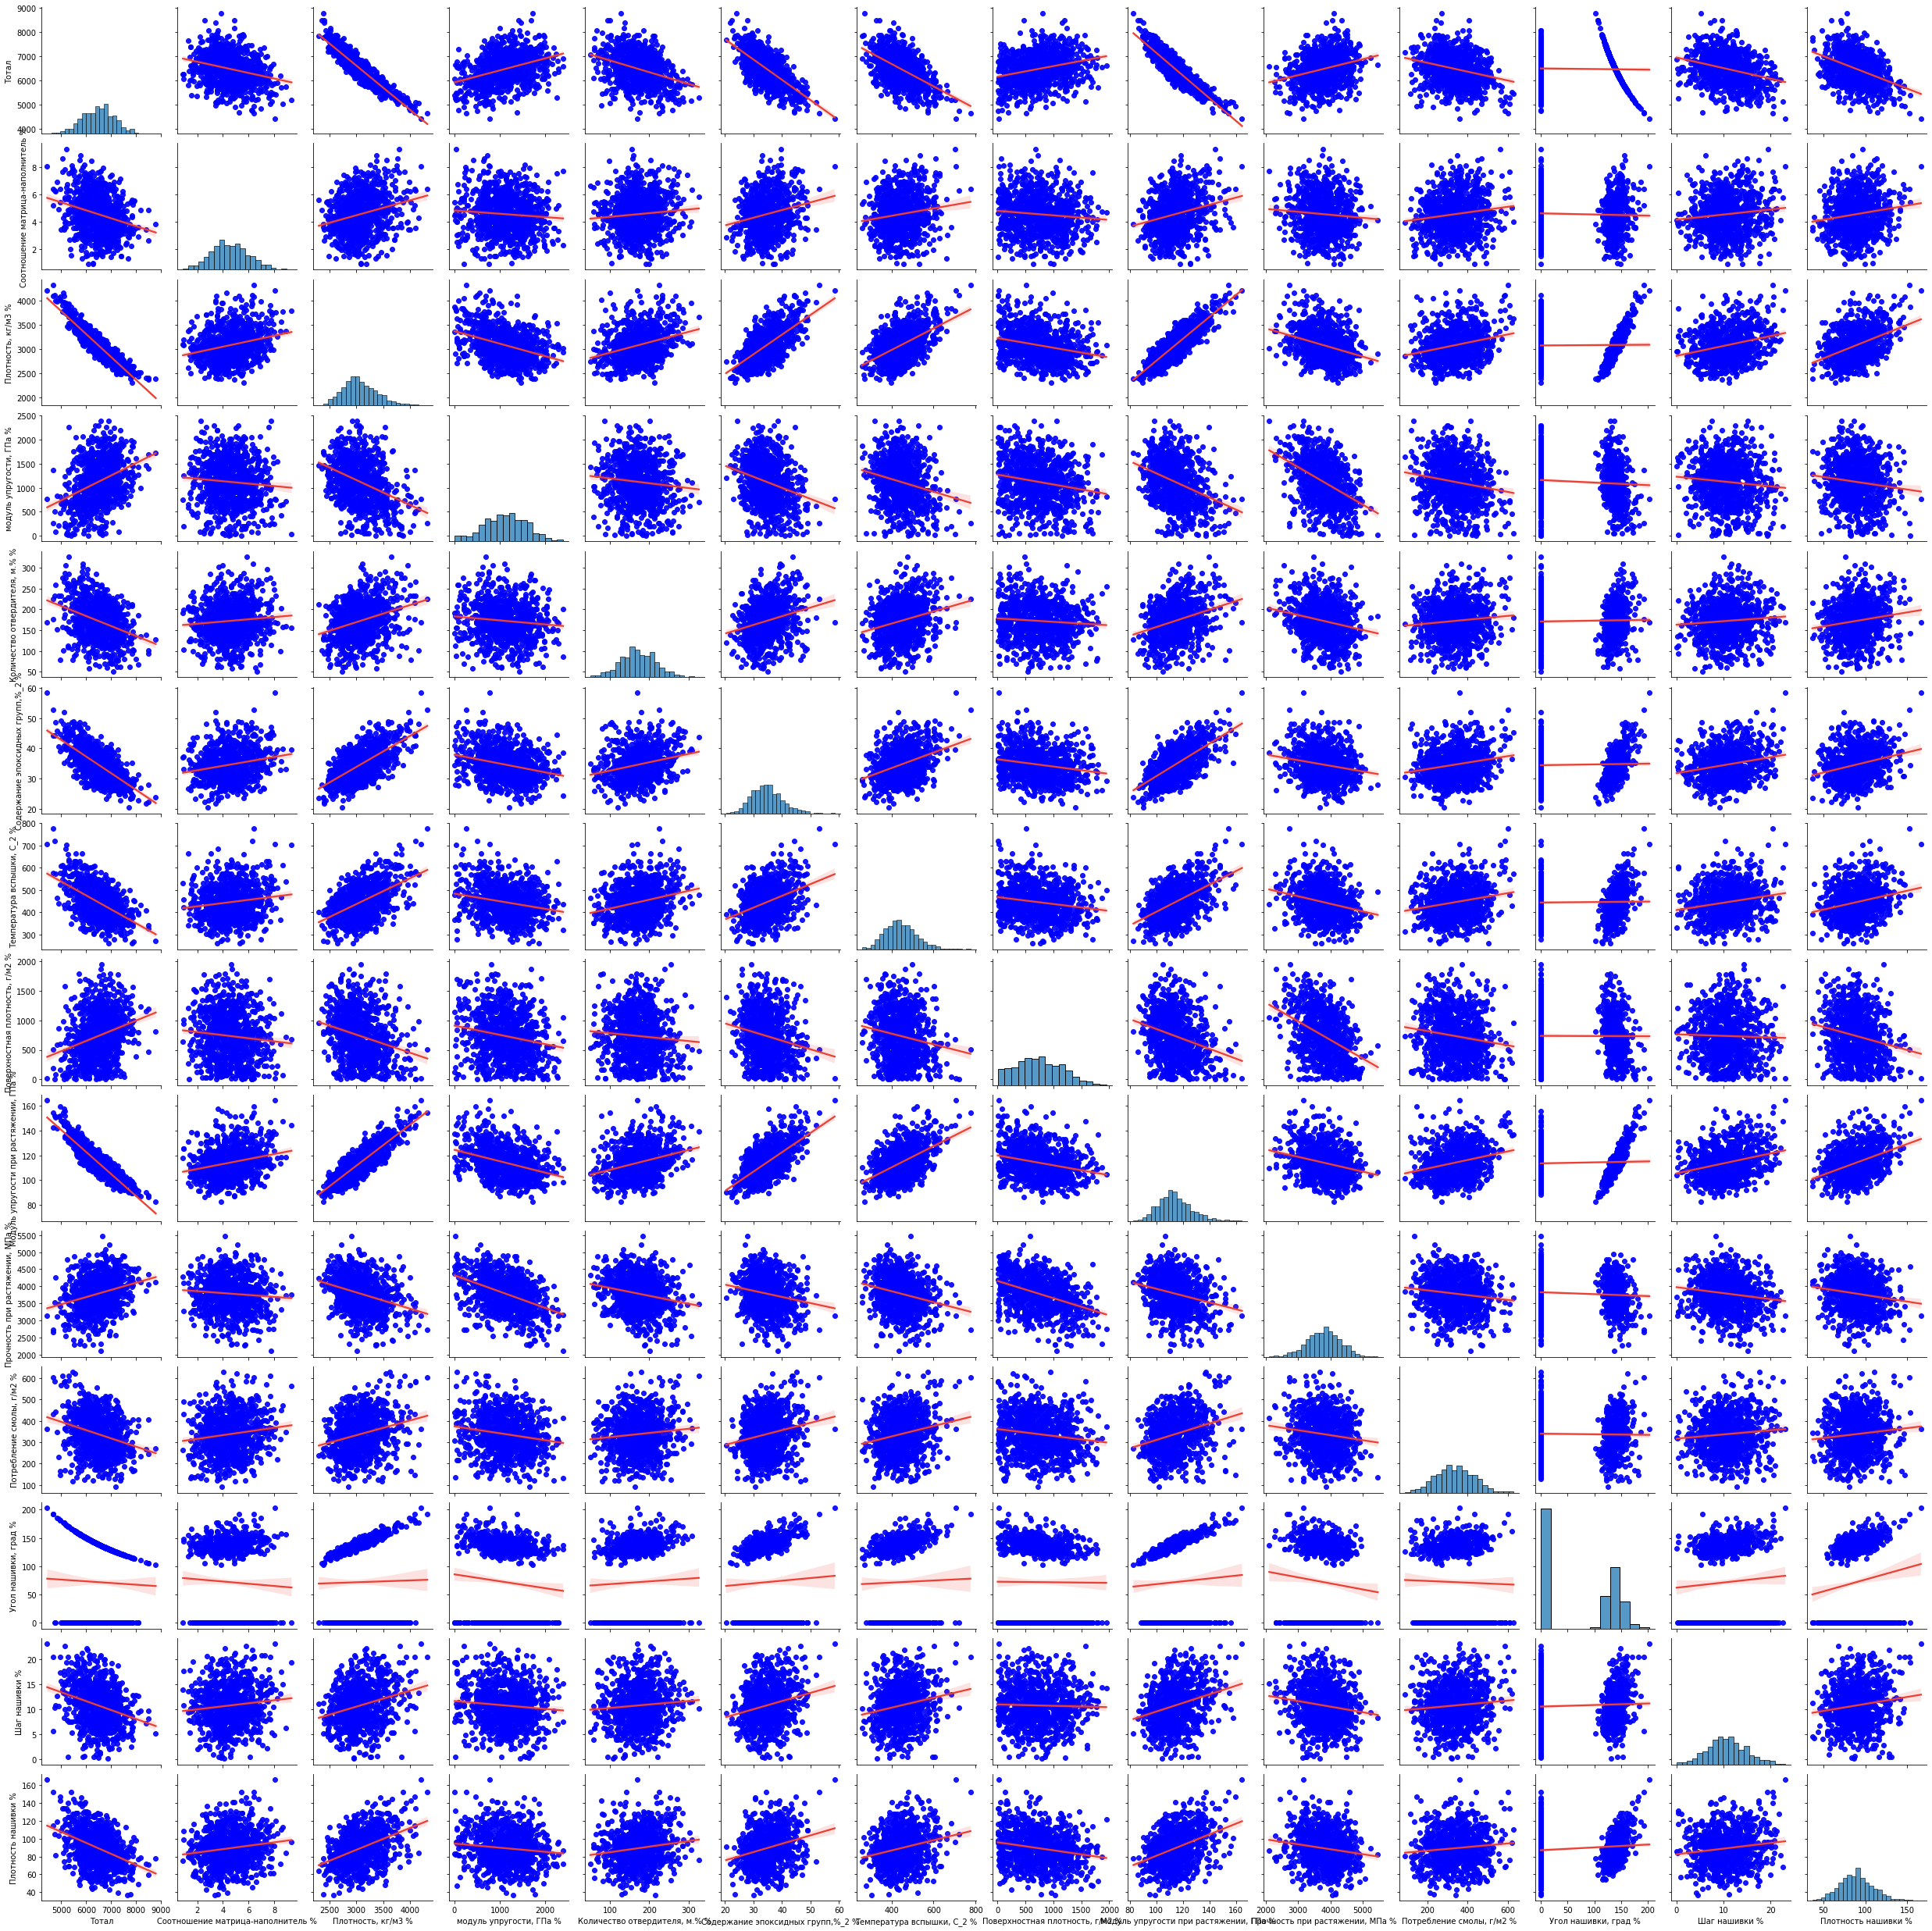

In [251]:
plt.figure(figsize=(15, 15))
sns.pairplot(df_actual, kind='reg', diag_kind='hist', plot_kws={'line_kws': {'color': '#eb4034'},
                                                                  'scatter_kws': {'alpha': 0.9,
                                                                                  'color': 'blue'}})
plt.show()        

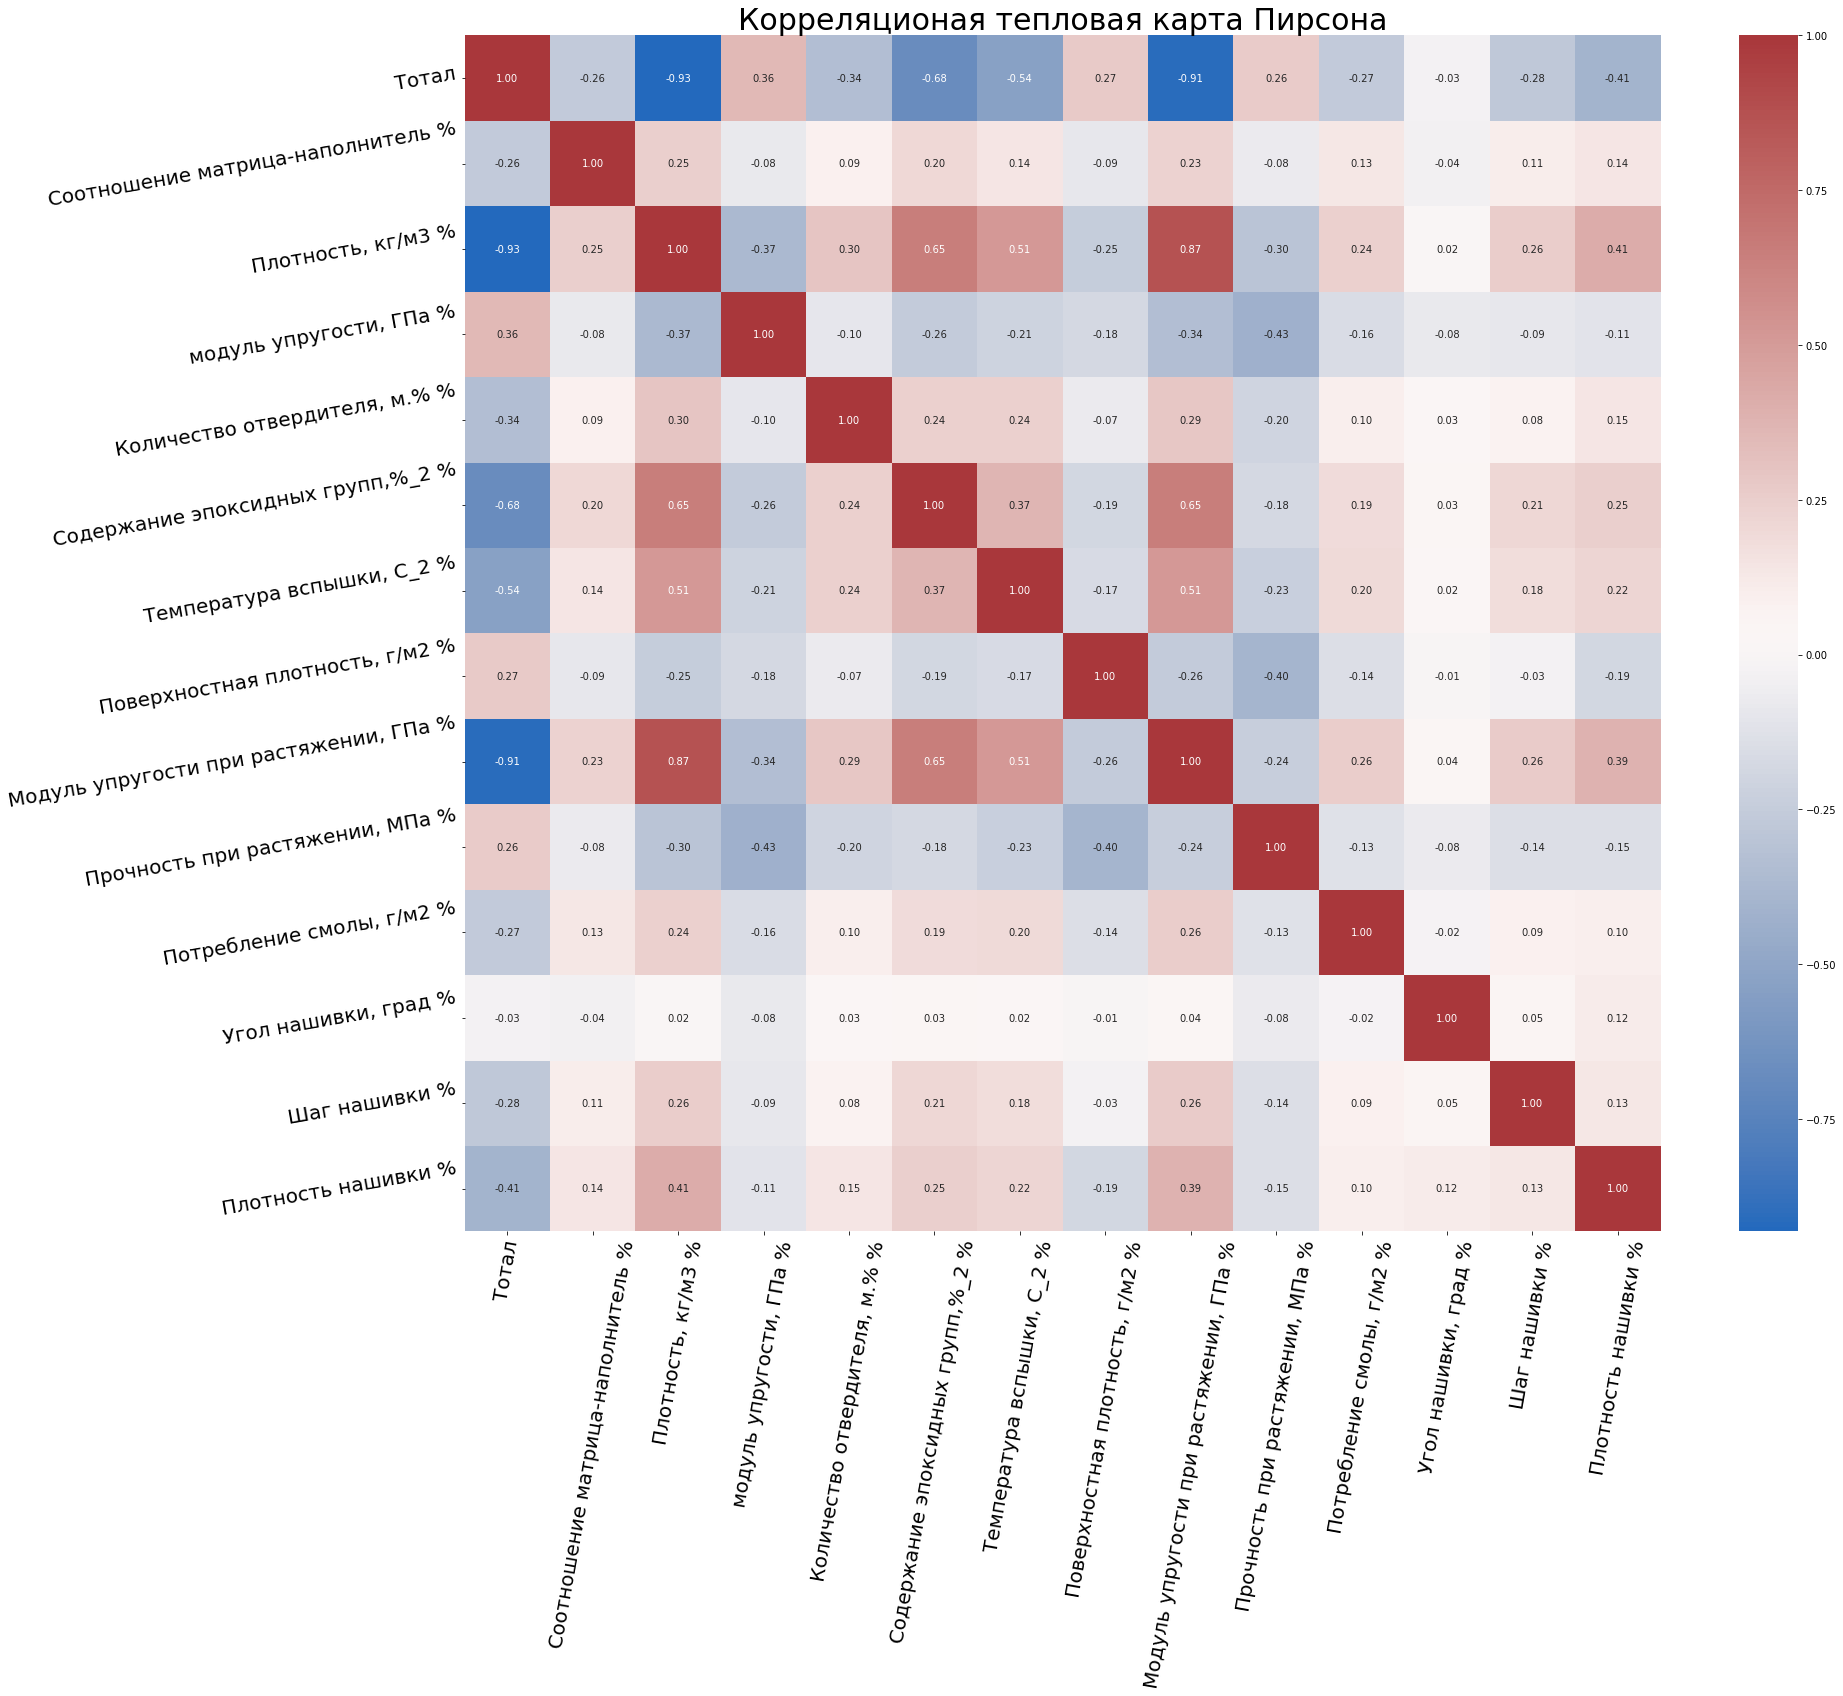

In [252]:
correlations = df_actual.corr()
plt.figure(figsize=(28, 22))
ax = sns.heatmap(correlations, square=True, annot=True,
                 fmt='.2f', linecolor='black', cmap="vlag")
ax.set_xticklabels(ax.get_xticklabels(), rotation=80, fontsize=20)
ax.set_yticklabels(ax.get_yticklabels(), rotation=10, fontsize=20)
plt.title("Корреляционая тепловая карта Пирсона", fontsize=30)
plt.show()

#### Проверим диаграмы размаха.

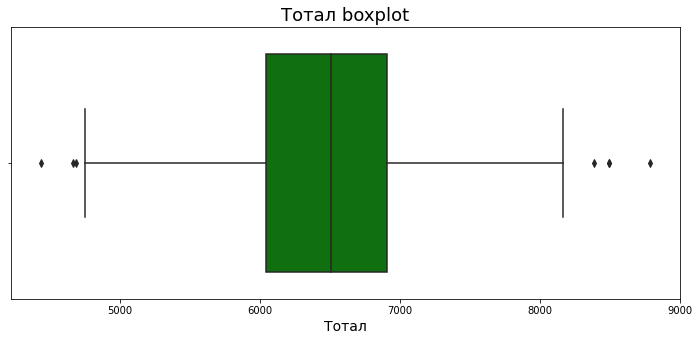

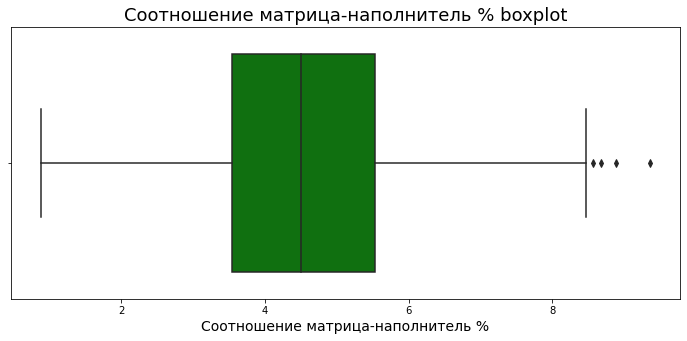

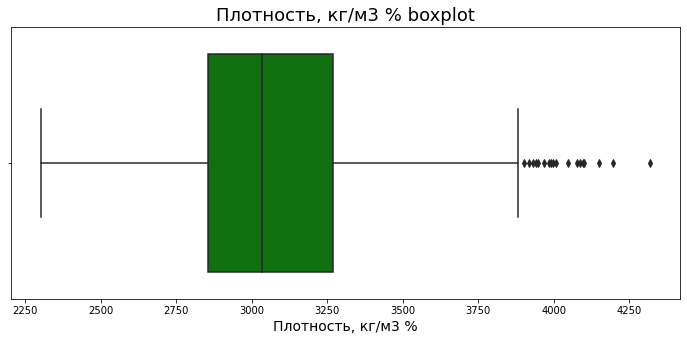

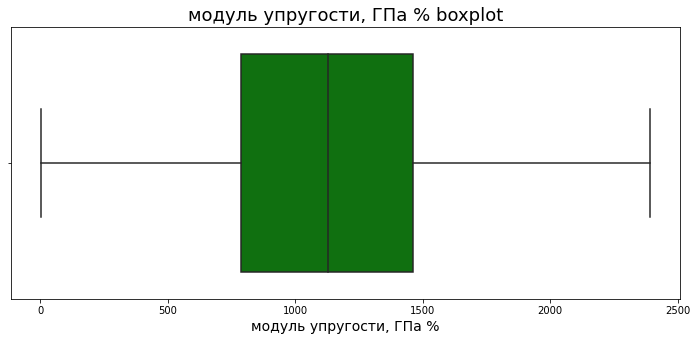

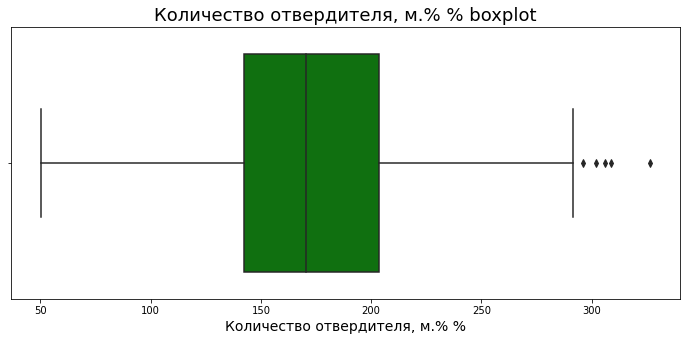

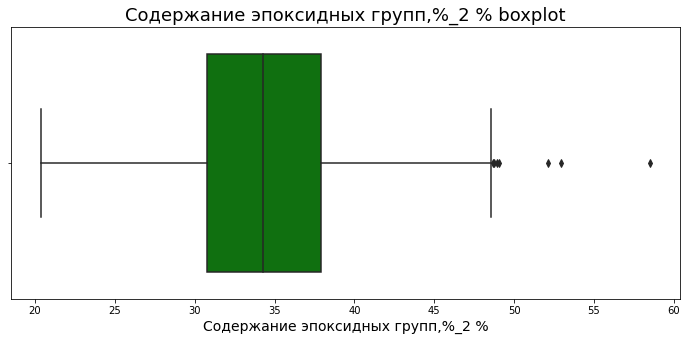

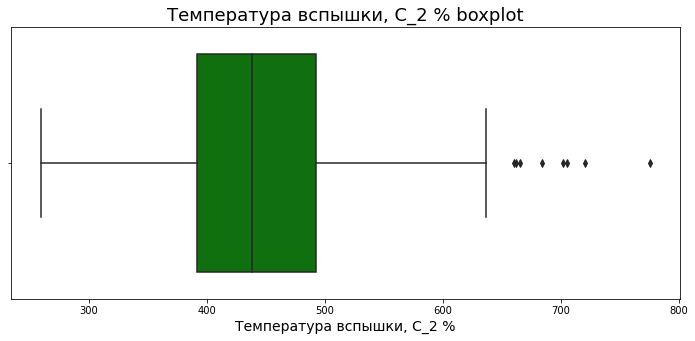

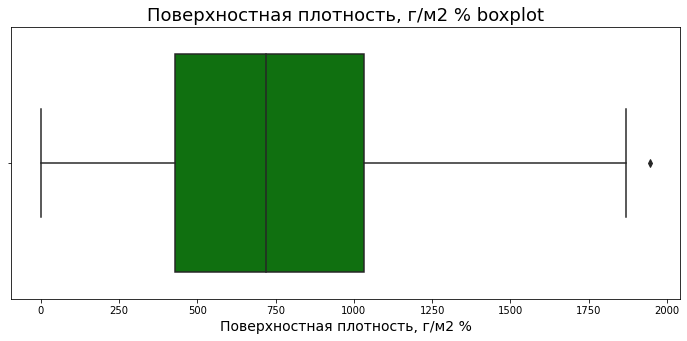

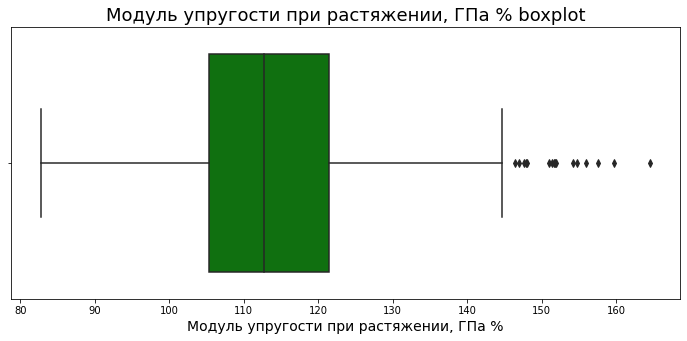

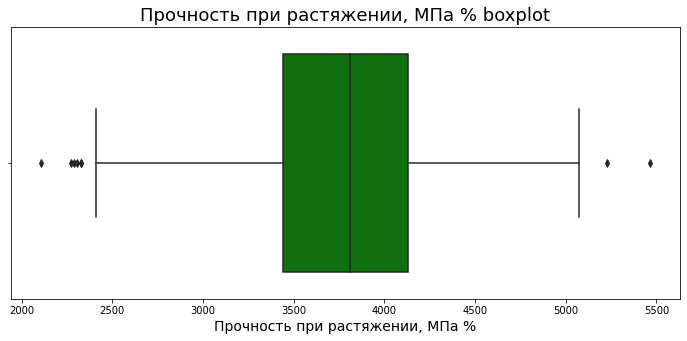

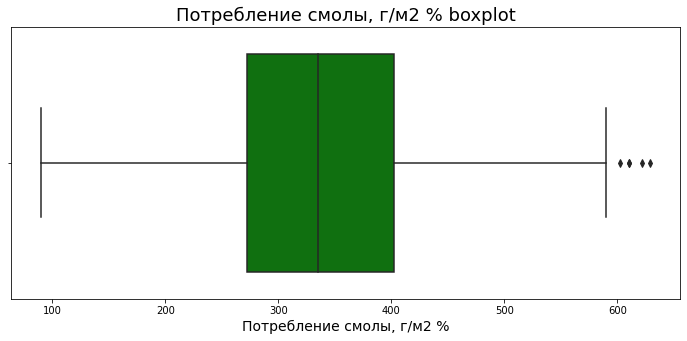

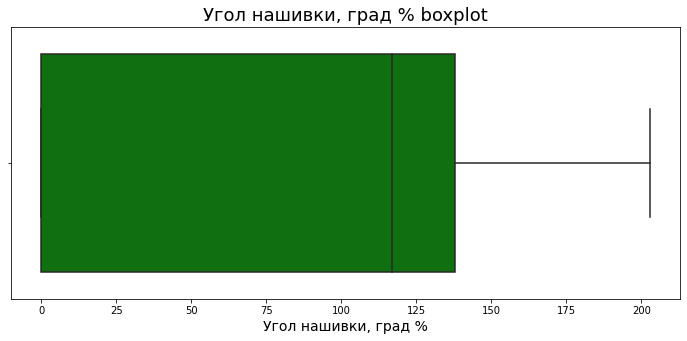

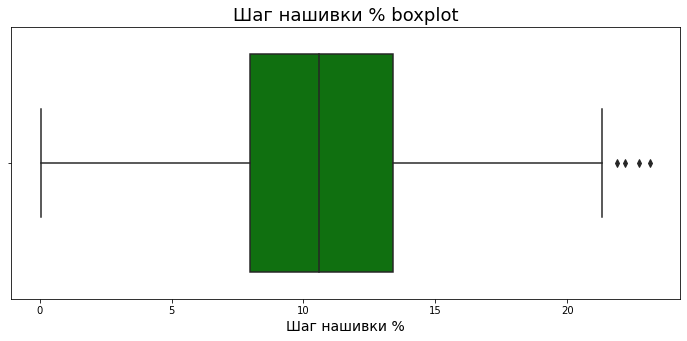

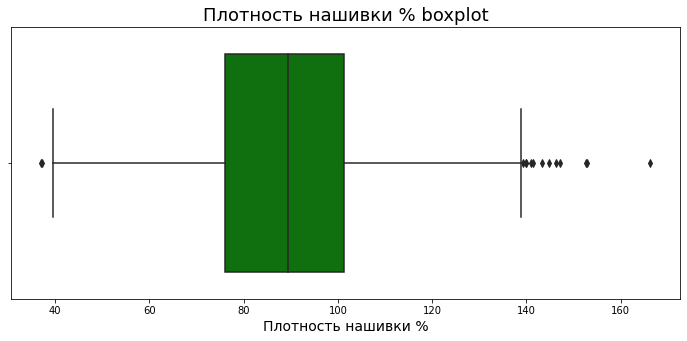

In [253]:
for col_name in df_actual:
    plt.figure(figsize=(12, 5))
    sns.boxplot(x=df_actual[col_name],color = 'green')
    plt.title(col_name + " boxplot", fontsize=18)
    plt.xlabel(col_name, fontsize=14)
    plt.show()

In [254]:
##### Удалим выбросы

In [255]:
col=['Тотал','Соотношение матрица-наполнитель %','Плотность, кг/м3 %', 'модуль упругости, ГПа %', 'Количество отвердителя, м.% %','Содержание эпоксидных групп,%_2 %', 'Температура вспышки, С_2 %','Поверхностная плотность, г/м2 %','Модуль упругости при растяжении, ГПа %','Прочность при растяжении, МПа %','Потребление смолы, г/м2 %','Шаг нашивки %','Плотность нашивки %']
for j in col:                                                                                #Выберем колонки которые содержат выбросы
    for i in [j]:
        q_1 = df_actual[j].quantile(0.25)
        q_3 = df_actual[j].quantile(0.75)
        IQR = q_3 - q_1
        min=q_1 - (IQR * 1.5)
        max=q_3 + (IQR * 1.5)
        df_actual.loc[df_actual[i] < min,i] = np.nan
        df_actual.loc[df_actual[i] > max,i] = np.nan# заменим на нулевые значения

In [256]:
df_actual = df_actual.dropna(axis = 0)# удаляем строки с нулевыми значениями

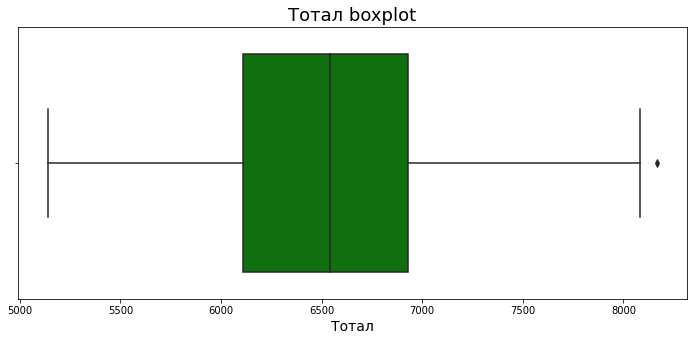

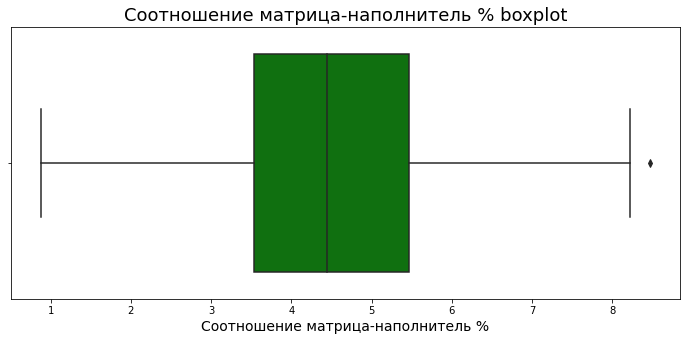

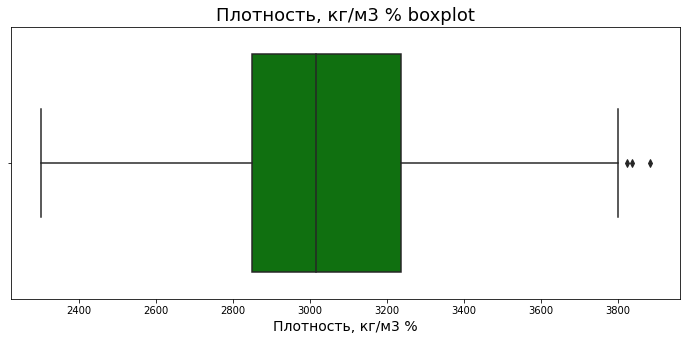

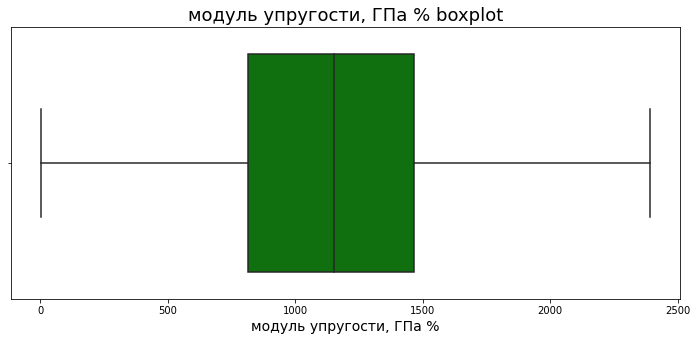

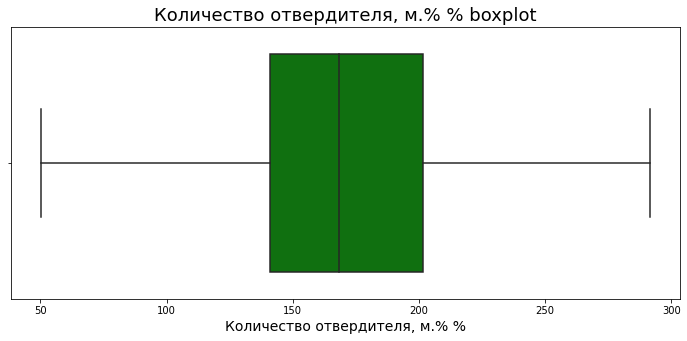

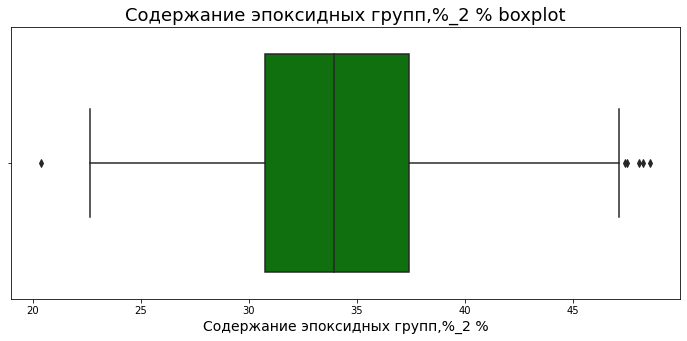

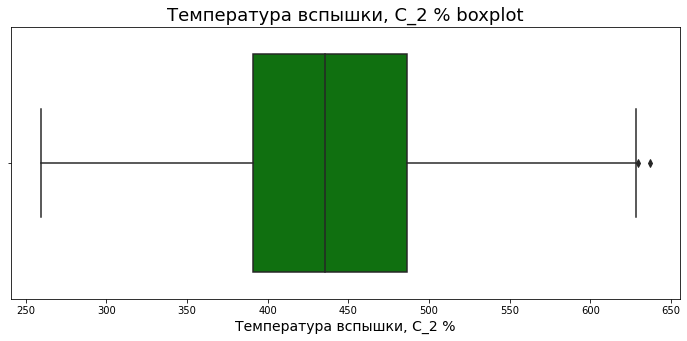

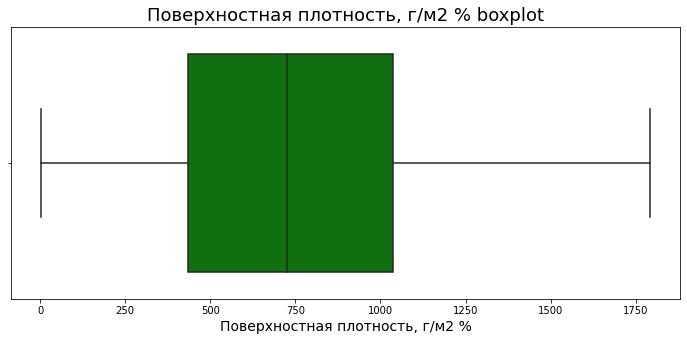

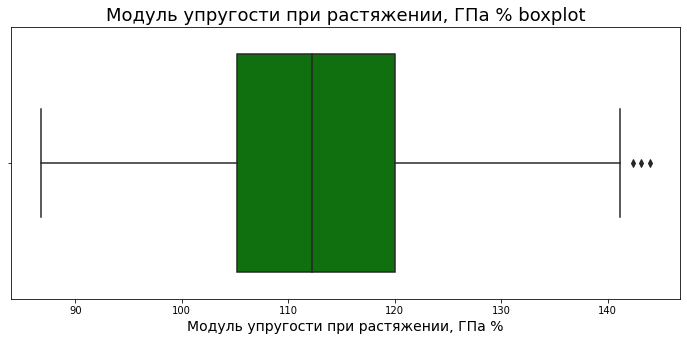

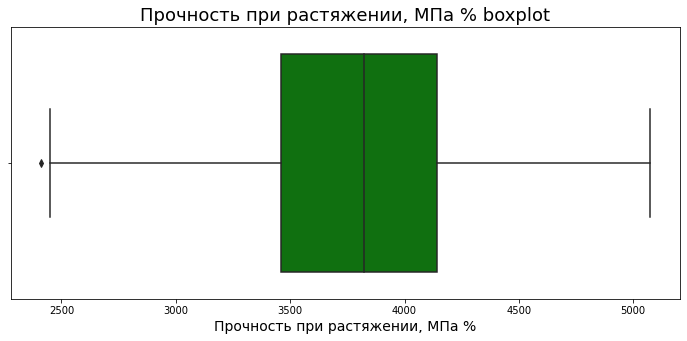

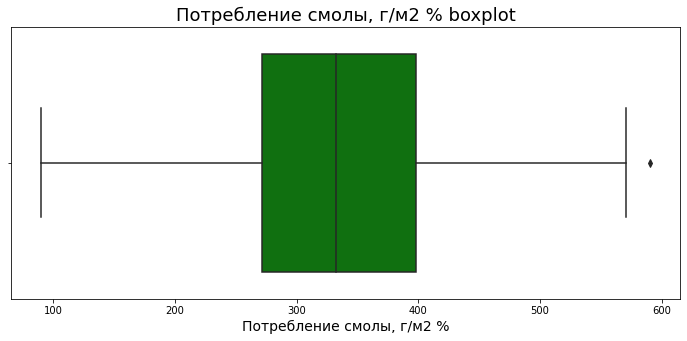

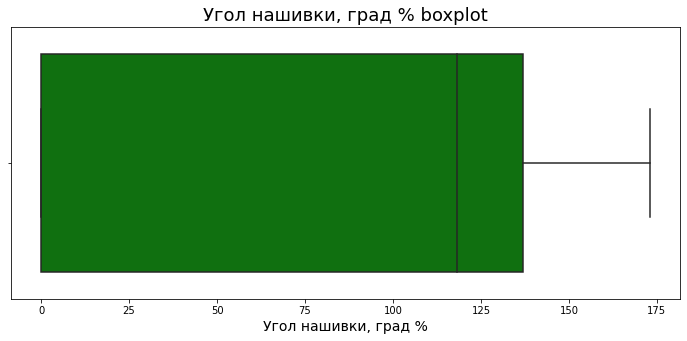

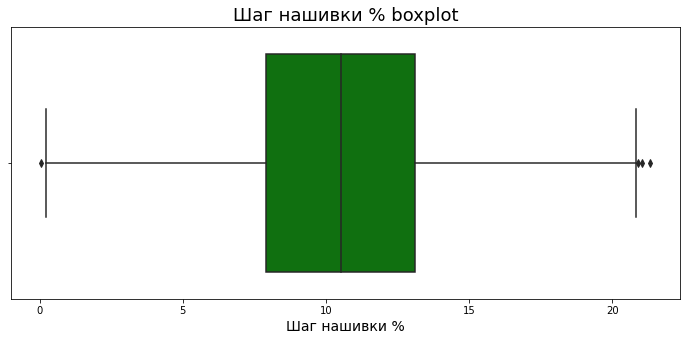

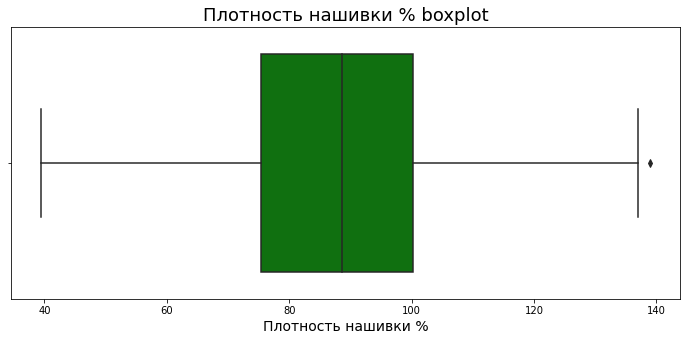

In [257]:
for col_name in df_actual:
    plt.figure(figsize=(12, 5))
    sns.boxplot(x=df_actual[col_name],color = 'green')
    plt.title(col_name + " boxplot", fontsize=18)
    plt.xlabel(col_name, fontsize=14)
    plt.show()

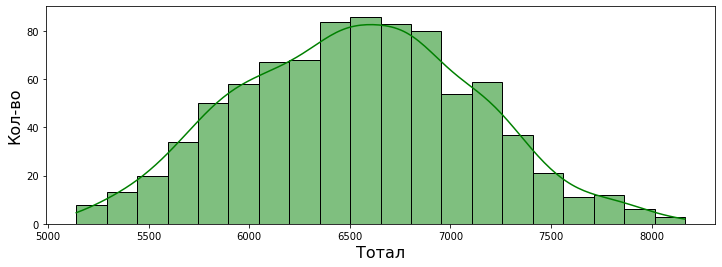

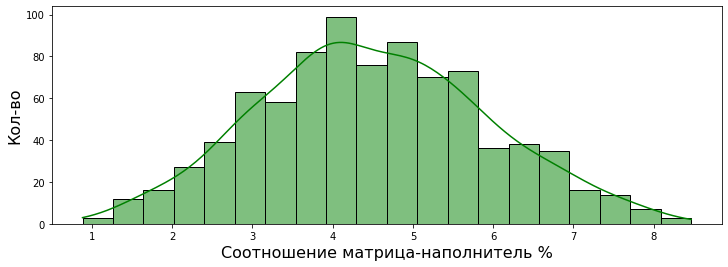

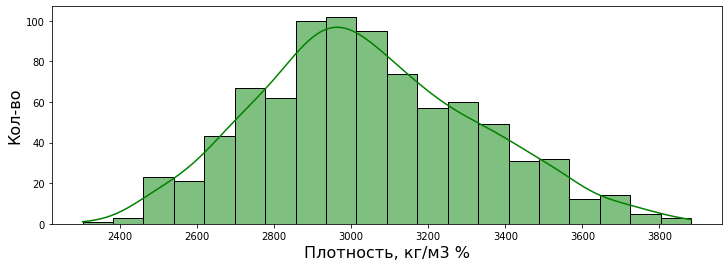

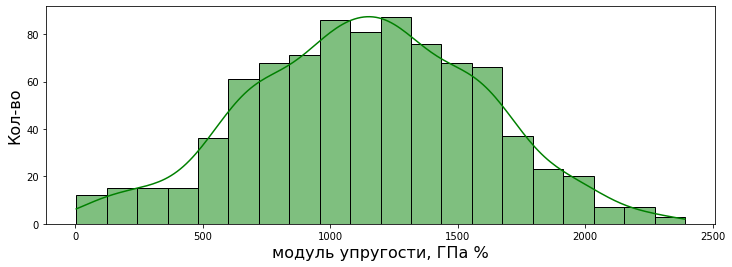

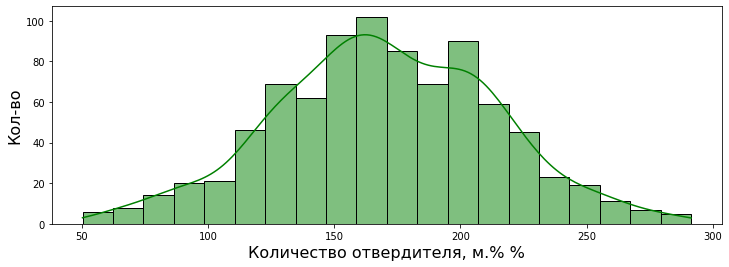

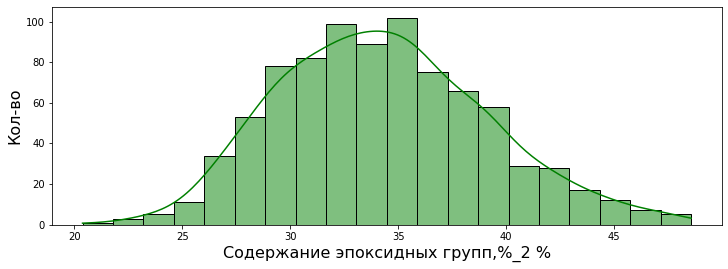

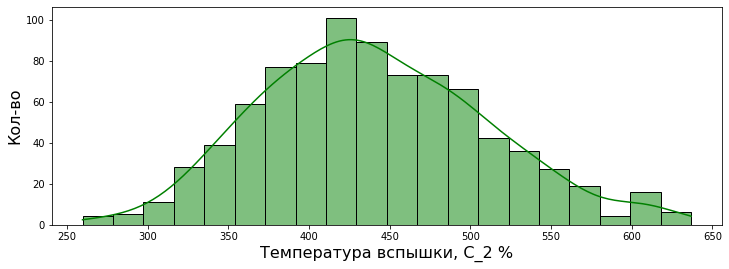

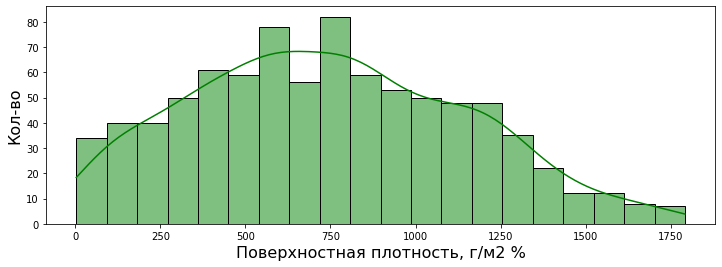

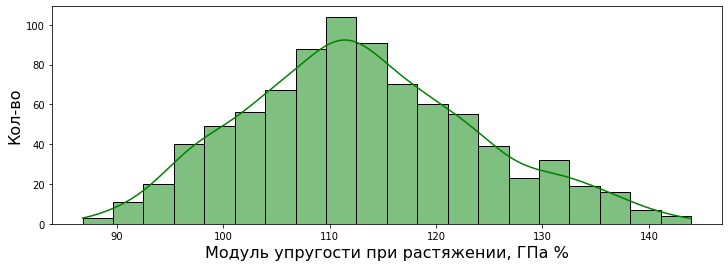

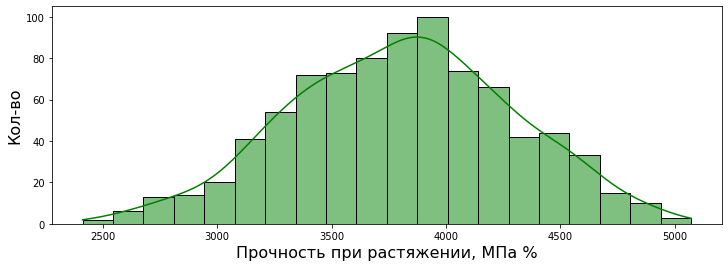

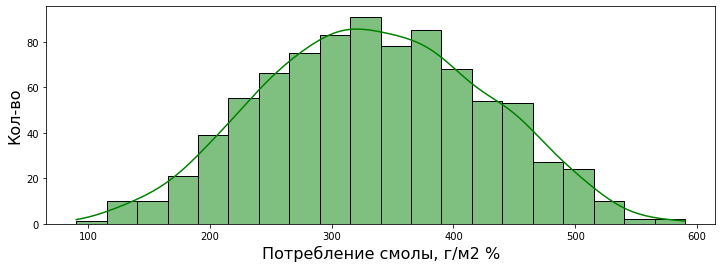

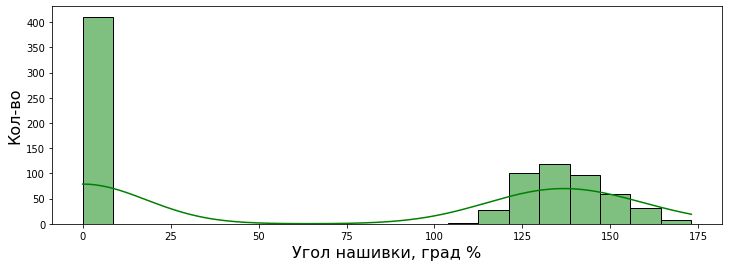

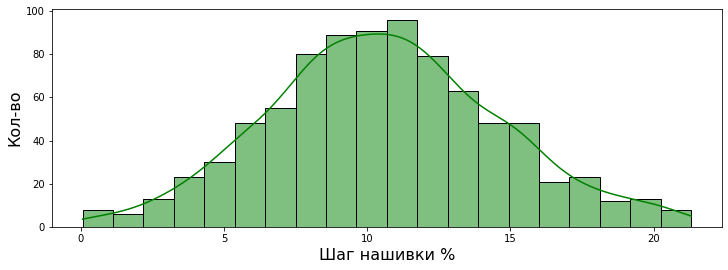

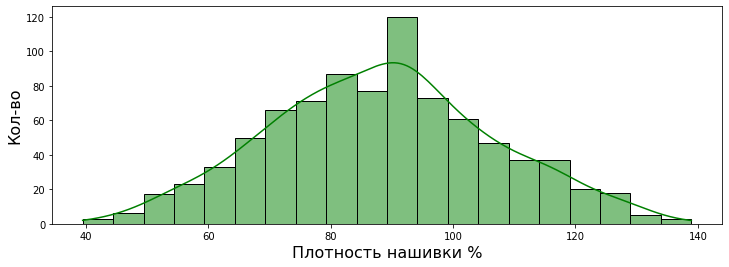

In [258]:
for col_name in df_actual:

    
    plt.figure(figsize=(12, 4))
    sns.histplot(x=col_name, kde=True, bins=20, color = 'green',data=df_actual)
    
    plt.xlabel(col_name, fontsize=16)
    plt.ylabel("Кол-во", fontsize=16)
    plt.show()

In [259]:
df_actual

Тотал  Соотношение матрица-наполнитель %  Плотность, кг/м3 %  \
8     5711.807018                           6.227482         3378.965700   
23    7121.800019                           3.632997         2742.670282   
25    6759.963267                           3.027341         3014.264620   
26    6325.422743                           2.934944         3190.648931   
27    6949.961637                           4.756192         2759.594378   
...           ...                                ...                 ...   
1018  6239.790775                           3.640100         3128.450892   
1019  5974.083917                           5.764938         3431.637719   
1020  6651.584796                           4.932064         2965.267565   
1021  6387.332445                           5.801093         3235.779240   
1022  6826.802837                           5.578043         2769.105119   

      модуль упругости, ГПа %  Количество отвердителя, м.% %  \
8                 1556.425134                     225.847967   
23                1595.939414                     193.248082   
25                1046.708183                     150.322195   
26                1322.116190                     214.059521   
27                 688.185450                     152.212250   
...                       ...                            ...   
1018              1462.958580                     139.415224   
1019               744.436536                     244.358767   
1020               626.672494                     166.176153   
1021              1160.853178                     221.372481   
1022               611.290881                     189.229745   

      Содержание эпоксидных групп,%_2 %  Температура вспышки, С_2 %  \
8                             37.203638                  525.227829   
23                            31.374840                  329.575223   
25                            34.240412                  461.995418   
26                            41.792487                  517.768361   
27                            25.718271                  472.167469   
...                                 ...                         ...   
1018                          32.249877                  520.489529   
1019                          32.807990                  425.530348   
1020                          36.017735                  373.479486   
1021                          30.132994                  431.760585   
1022                          40.245432                  440.839900   

      Поверхностная плотность, г/м2 %  Модуль упругости при растяжении, ГПа %  \
8                          665.288584                              131.306957   
23                         780.551900                              113.458987   
25                         810.065376                              109.197437   
26                         238.658276                              122.064192   
27                         757.834628                              104.095120   
...                               ...                                     ...   
1018                       335.265568                              117.136878   
1019                       586.970044                              122.061939   
1020                      1112.731497                              112.355696   
1021                      1004.281768                              115.921175   
1022                      1111.424923                              108.849934   

      Прочность при растяжении, МПа %  Потребление смолы, г/м2 %  \
8                         3151.366975                 210.091132   
23                        3632.990221                 346.279193   
25                        3881.716961                 263.608764   
26                        3909.916056                 194.998131   
27                        4401.510614                 396.514246   
...                               ...                        ...   
1018                      38

## Обучим модель для прогноза модуля упругости  при растяжении

### Разделение на обучающие и тестовые наборы

In [260]:
X = df_actual.drop(['Модуль упругости при растяжении, ГПа %', 'Тотал','Шаг нашивки %'], axis=1)
y = df_actual['Модуль упругости при растяжении, ГПа %']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(597, 11) (257, 11) (597,) (257,)


In [261]:
pt = PowerTransformer()
X_train = pd.DataFrame(pt.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(pt.transform(X_test), columns=X_test.columns)

In [262]:
#### Нормализация и масштабирование функций. Трансформация Йео-Джонсона

In [263]:
feature_scaler = MinMaxScaler()
X_train = pd.DataFrame(feature_scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(feature_scaler.transform(X_test),columns=X_test.columns)

In [264]:
X_test

Соотношение матрица-наполнитель %  Плотность, кг/м3 %  \
0                             0.324796            0.335888   
1                             0.414655            0.491865   
2                             0.573881            0.566495   
3                             0.711356            0.687320   
4                             0.477990            0.271885   
..                                 ...                 ...   
252                           0.353584            0.799536   
253                           0.439198            0.852941   
254                           0.334963            0.652963   
255                           0.440503            0.470298   
256                           0.738593            0.691624   

     модуль упругости, ГПа %  Количество отвердителя, м.% %  \
0                   0.525366                       0.618135   
1                   0.574490                       0.437276   
2                   0.529423                       0.382170   
3                   0.286092                       0.675256   
4                   0.286468                       0.751571   
..                       ...                            ...   
252                 0.315306                       0.412882   
253                 0.235747                       0.490556   
254                 0.628323                       0.682989   
255                 0.323914                       0.599187   
256                 0.384329                       0.459519   

     Содержание эпоксидных групп,%_2 %  Температура вспышки, С_2 %  \
0                             0.361753                    0.518364   
1                             0.419723                    0.647475   
2                             0.594005                    0.473169   
3                             0.746467                    0.495558   
4                             0.453620                    0.534746   
..                                 ...                         ...   
252                           0.727144                    0.821723   
253                           0.547956                    0.572824   
254                           0.628304                    0.451547   
255                           0.613856                    0.357261   
256                           0.645552                    0.471967   

     Поверхностная плотность, г/м2 %  Прочность при растяжении, МПа %  \
0                           0.387277                         0.815360   
1                           0.633260                         0.430989   
2                           0.764097                         0.363082   
3                           0.548375                         0.619063   
4                           0.412852                         0.919417   
..                               ...                              ...   
252                         0.749168                         0.350016   
253                         0.221700                         0.755506   
254                         0.762108                         0.208142   
255                         0.842008                         0.506135   
256                         0.279577                         0.692311   

     Потребление смолы, г/м2 %  Угол нашивки, град %  Плотность нашивки %  
0                     0.310215              0.000000             0.368201  
1                     0.299366              0.941621             0.320921  
2                     0.440369              0.000000             0.554772  
3                     0.739457              0.000000             0.091287  
4                     0.670444              0.934185             0.330948  
..                         ...                   ...                  ...  
252                   0.559086              0.000000             0.219965  
253                   0.813887              0.000000             0.350176  
254                   0.348260              0.000000             0.668912  
255                   0.6

### Ridge regression

In [265]:
# Создадим списки для хранения результатов проверки протестированных моделей
r2_scores = {}
mae_scores = {}
rmse_scores = {}



#### Гиперпараметры для поиска по сетке

In [266]:
params = [{'alpha': [0.0004, 0.0003, 0.0002, 0.0001],
           "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}]

#### Поиск по сетке с перекрестной проверкой

In [267]:
ridge_reg = Ridge()
cv_scheme = KFold(n_splits=10, shuffle=True, random_state=42)

cv = GridSearchCV(estimator=ridge_reg,param_grid=params,
                  scoring='neg_root_mean_squared_error', cv=cv_scheme, return_train_score=True, n_jobs=-1)

cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(), n_jobs=-1,
             param_grid=[{'alpha': [0.0004, 0.0003, 0.0002, 0.0001],
                          'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg',
                                     'sag', 'saga']}],
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [268]:
print("Лучший параметр для гребневой регрессии:")
print(cv.best_params_)
print("Лучший средний балл перекрестной проверки:")
print(cv.best_score_)

Лучший параметр для гребневой регрессии:
{'alpha': 0.0004, 'solver': 'lsqr'}
Лучший средний балл перекрестной проверки:
-6.0288034031312545


#### Оценка  по полному набору данных

In [269]:
alpha = cv.best_params_['alpha']
solver = cv.best_params_['solver']

ridge_reg = Ridge(alpha=alpha, solver=solver)
ridge_reg.fit(X_train, y_train)

y_pred = ridge_reg.predict(X_test)

ridge_r2 = r2_score(y_test, y_pred)
ridge_mae = mean_absolute_error(y_test, y_pred)
ridge_rmse = mean_squared_error(y_test, y_pred, squared=False)
print("---RIDGE REGRESSION---")
print("R2 score: "+str(ridge_r2))
print("Mean Absolute Error: "+str(ridge_mae))
print("Root Mean Squared Error: "+str(ridge_rmse))

r2_scores["ridge_regression"] = ridge_r2
mae_scores["ridge_regression"] = ridge_mae
rmse_scores["ridge_regression"] = ridge_rmse

---RIDGE REGRESSION---
R2 score: 0.7516597297517922
Mean Absolute Error: 4.367115715907435
Root Mean Squared Error: 5.404568835006044


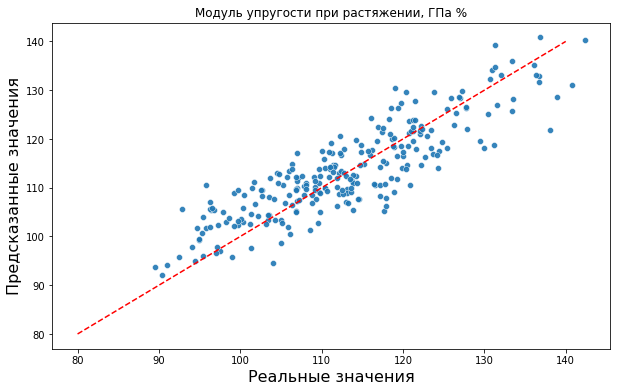

In [270]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.9)
line_X = np.linspace(80, 140, 140)
line_Y = line_X
plt.plot(line_X, line_Y, 'r--')
plt.title("Модуль упругости при растяжении, ГПа %", fontsize=12)
plt.xlabel('Реальные значения', fontsize=16)
plt.ylabel('Предсказанные значения', fontsize=16)
plt.show()

In [271]:
f = pd.DataFrame({'Актуальные': y_test, 'Предсказанные': y_pred})
f


Актуальные  Предсказанные
98    95.303293     100.808061
548  114.530026     107.744088
263  112.149924     112.991020
280  114.196785     119.764587
956   95.772454     101.665308
..          ...            ...
187  130.400799     125.164789
123  127.708729     126.613041
221  119.303526     116.467945
220   95.746823     110.590473
55   118.382868     121.056164

[257 rows x 2 columns]

### Lasso regression

#### Гиперпараметры для поиска по сетке

In [272]:
params = [{'alpha': [0.0006, 0.0005, 0.0004,0.0003,0.0002,0.0001]}]

#### Поиск по сетке с перекрестной проверкой

In [273]:
lasso_reg = Lasso(max_iter=5000)
cv_scheme = KFold(n_splits=10, shuffle=True, random_state=1)
cv = GridSearchCV(estimator=lasso_reg, param_grid=params,
                  scoring='neg_root_mean_squared_error', cv=cv_scheme, return_train_score=True, n_jobs=-1)

cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=Lasso(max_iter=5000), n_jobs=-1,
             param_grid=[{'alpha': [0.0006, 0.0005, 0.0004, 0.0003, 0.0002,
                                    0.0001]}],
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [274]:
print("Лучший параметр для Лассо регрессии :")
print(cv.best_params_)
print("Наилучший средний показатель перекрестной проверки:")
print(cv.best_score_)

Лучший параметр для Лассо регрессии :
{'alpha': 0.0006}
Наилучший средний показатель перекрестной проверки:
-6.029203621671508


#### Оценка по полному набору данных

In [275]:
alpha = cv.best_params_['alpha']

lasso_reg = Lasso(max_iter=5000, alpha=alpha)
lasso_reg.fit(X_train, y_train)

y_pred = lasso_reg.predict(X_test)
lasso_r2 = r2_score(y_test, y_pred)
lasso_mae = mean_absolute_error(y_test, y_pred)
lasso_rmse = mean_squared_error(y_test, y_pred, squared=False)
print("---LASSO REGRESSION---")
print("R2 score: "+str(lasso_r2))
print("Mean Absolute Error: "+str(lasso_mae))
print("Root Mean Squared Error: "+str(lasso_rmse))

r2_scores["lasso_regression"] = lasso_r2
mae_scores["lasso_regression"] = lasso_mae
rmse_scores["lasso_regression"] = lasso_rmse

---LASSO REGRESSION---
R2 score: 0.75102494416096
Mean Absolute Error: 4.372434674806536
Root Mean Squared Error: 5.411471768780207


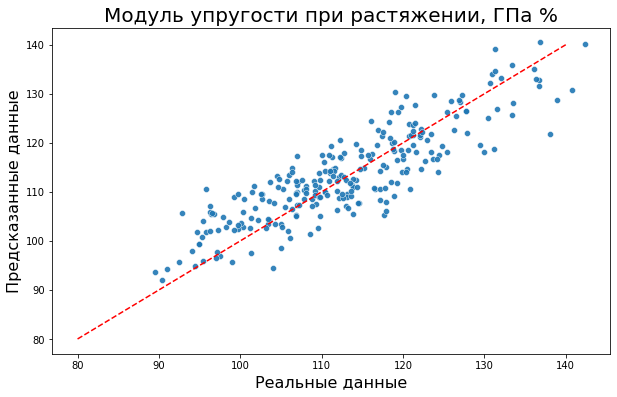

In [276]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.9)
line_X = np.linspace(80, 140, 140)
line_Y = line_X
plt.plot(line_X, line_Y, 'r--')
plt.title("Модуль упругости при растяжении, ГПа %", fontsize=20)
plt.xlabel('Реальные данные', fontsize=16)
plt.ylabel('Предсказанные данные', fontsize=16)
plt.show()

## GradientBoostingRegressor

In [277]:
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
reg_r2 = r2_score(y_test, y_pred)
reg_mae = mean_absolute_error(y_test, y_pred)
reg_rmse = mean_squared_error(y_test, y_pred, squared=False)

print("---GradientBoostingRegressor---")
print("R2 score: "+str(reg_r2))
print("Mean Absolute Error: "+str(reg_mae))
print("Root Mean Squared Error: "+str(reg_rmse))

r2_scores["GradientBoostingRegressor"] = reg_r2
mae_scores["GradientBoostingRegressor"] = reg_mae
rmse_scores["GradientBoostingRegressor"] = reg_rmse

---GradientBoostingRegressor---
R2 score: 0.7368530623773486
Mean Absolute Error: 4.496646568881189
Root Mean Squared Error: 5.5633532666145555


## RandomForestRegressor

In [278]:
rforest_reg = RandomForestRegressor()
rforest_reg.fit(X_train, y_train)

y_pred = rforest_reg.predict(X_test)

rforest_r2 = r2_score(y_test, y_pred)
rforest_mae = mean_absolute_error(y_test, y_pred)
rforest_rmse = mean_squared_error(y_test, y_pred, squared=False)
print("---RANDOM FOREST REGRESSOR---")
print("R2 score: "+str(rforest_r2))
print("Mean Absolute Error: "+str(rforest_mae))
print("Root Mean Squared Error: "+str(rforest_rmse))

r2_scores["random_forest"] = rforest_r2
mae_scores["random_forest"] = rforest_mae
rmse_scores["random_forest"] = rforest_rmse

---RANDOM FOREST REGRESSOR---
R2 score: 0.7331460375370751
Mean Absolute Error: 4.64331662845674
Root Mean Squared Error: 5.602402483479884


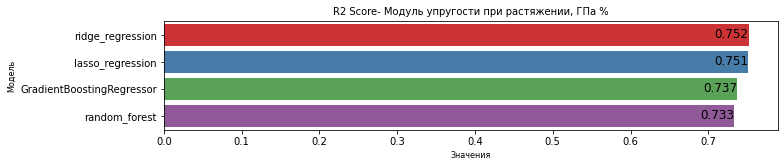

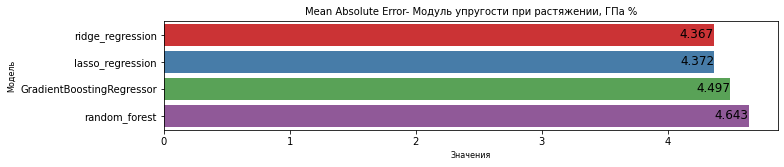

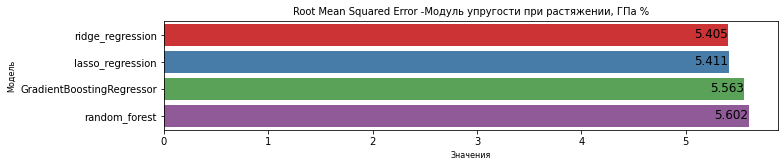

In [279]:
#визуализируем наши метрики
scores = [r2_scores, mae_scores, rmse_scores]
titles = ['R2 Score- Модуль упругости при растяжении, ГПа %', 'Mean Absolute Error- Модуль упругости при растяжении, ГПа %', 'Root Mean Squared Error -Модуль упругости при растяжении, ГПа %']

for i in range(len(scores)):
    plt.figure(figsize=(11, 2))
    graph = sns.barplot(x=list(scores[i].values()), y=list(
        scores[i].keys()), palette="Set1")
    plt.title(titles[i], fontsize=10)
    plt.xlabel("Значения", fontsize=8)
    plt.ylabel("Модель", fontsize=8)
   
    for p in graph.patches:
        if not math.isnan(p.get_width()):
            x = p.get_width() - graph.patches[0].get_width()*0
            y = p.get_y() + p.get_height() - 0.3
            value = round(p.get_width(), 3)
            graph.text(x, y, value, ha="right", color='black', size='large')    
    plt.show()
   

## Обучим модель для прогноза прочности при растяжении

In [280]:
X_1 = df_actual.drop(['Прочность при растяжении, МПа %','Тотал','Угол нашивки, град %'], axis=1)
y_1 = df_actual['Прочность при растяжении, МПа %']


X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.3, random_state=2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(597, 11) (257, 11) (597,) (257,)


In [281]:
pt = PowerTransformer()

X_train = pd.DataFrame(pt.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(pt.transform(X_test), columns=X_test.columns)

In [282]:
feature_scaler = MinMaxScaler()
X_train = pd.DataFrame(feature_scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(feature_scaler.transform(X_test),columns=X_train.columns)

### Ridge regression

In [283]:
r2_scores = {}
mae_scores = {}
rmse_scores = {}

#### Гиперпараметры для поиска по сетке

In [284]:
params = [{'alpha': [0.0004, 0.0003, 0.0002, 0.0001],
           "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}]

#### Поиск по сетке с перекрестной проверкой

In [285]:
ridge_reg = Ridge()
cv_scheme = KFold(n_splits=10, shuffle=True, random_state=1)
cv = GridSearchCV(estimator=ridge_reg, param_grid=params,
                  scoring='neg_root_mean_squared_error', cv=cv_scheme, return_train_score=True, n_jobs=-1)

cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=Ridge(), n_jobs=-1,
             param_grid=[{'alpha': [0.0004, 0.0003, 0.0002, 0.0001],
                          'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg',
                                     'sag', 'saga']}],
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [286]:
print("Лучший параметр для гребневой регрессии:")
print(cv.best_params_)
print("Лучший средний балл перекрестной проверки:")
print(cv.best_score_)

Лучший параметр для гребневой регрессии:
{'alpha': 0.0004, 'solver': 'saga'}
Лучший средний балл перекрестной проверки:
-85.2339419404412


####  Оценка по полному набору данных 

In [287]:
alpha = cv.best_params_['alpha']
solver = cv.best_params_['solver']

ridge_reg = Ridge(alpha=alpha,solver=solver)
ridge_reg.fit(X_train, y_train)

y_pred = ridge_reg.predict(X_test)
ridge_r2 = r2_score(y_test, y_pred)
ridge_mae = mean_absolute_error(y_test, y_pred)
ridge_rmse = mean_squared_error(y_test, y_pred, squared=False)
print("---RIDGE REGRESSION---")
print("R2 score: "+str(ridge_r2))
print("Mean Absolute Error: "+str(ridge_mae))
print("Root Mean Squared Error: "+str(ridge_rmse))

r2_scores["ridge_regression"] = ridge_r2
mae_scores["ridge_regression"] = ridge_mae
rmse_scores["ridge_regression"] = ridge_rmse

---RIDGE REGRESSION---
R2 score: 0.9675410213594061
Mean Absolute Error: 70.1030145631305
Root Mean Squared Error: 87.67616991167597


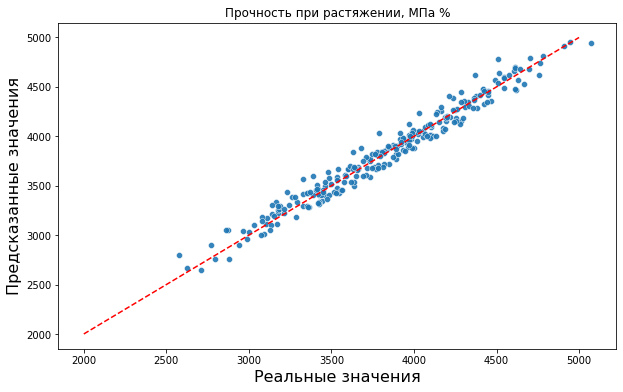

In [288]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.9)
line_X = np.linspace(2000, 5000, 5000)
line_Y = line_X
plt.plot(line_X, line_Y, 'r--')
plt.title("Прочность при растяжении, МПа %", fontsize=12)
plt.xlabel('Реальные значения', fontsize=16)
plt.ylabel('Предсказанные значения', fontsize=16)
plt.show()

### Lasso regression

In [289]:
lasso_reg = Lasso(max_iter=5000)

#### Гиперпараметры для поиска по сетке

In [290]:
params = [{'alpha': [0.0006, 0.0005, 0.0004,0.0003,0.0002,0.0001]}]

#### Поиск по сетке с перекрестной проверкой

In [291]:
%%time
cv_scheme = KFold(n_splits=10, shuffle=True, random_state=1)
cv = GridSearchCV(estimator=lasso_reg, param_grid=params,
                  scoring='neg_root_mean_squared_error', cv=cv_scheme, return_train_score=True, n_jobs=-1)

cv.fit(X_train, y_train)

Wall time: 188 ms


GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=Lasso(max_iter=5000), n_jobs=-1,
             param_grid=[{'alpha': [0.0006, 0.0005, 0.0004, 0.0003, 0.0002,
                                    0.0001]}],
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [292]:
print("Лучший параметр для гребневой регрессии:")
print(cv.best_params_)
print("Лучший средний балл перекрестной проверки:")
print(cv.best_score_)

Лучший параметр для гребневой регрессии:
{'alpha': 0.0006}
Лучший средний балл перекрестной проверки:
-85.24487330311379


#### Оценка по полному набору данных

In [293]:
alpha = cv.best_params_['alpha']

lasso_reg = Lasso(max_iter=5000, alpha=alpha)
lasso_reg.fit(X_train, y_train)

y_pred = lasso_reg.predict(X_test)
lasso_r2 = r2_score(y_test, y_pred)
lasso_mae = mean_absolute_error(y_test, y_pred)
lasso_rmse = mean_squared_error(y_test, y_pred, squared=False)
print("---LASSO REGRESSION---")
print("R2 score: "+str(lasso_r2))
print("Mean Absolute Error: "+str(lasso_mae))
print("Root Mean Squared Error: "+str(lasso_rmse))

r2_scores["lasso_regression"] = lasso_r2
mae_scores["lasso_regression"] = lasso_mae
rmse_scores["lasso_regression"] = lasso_rmse

---LASSO REGRESSION---
R2 score: 0.9675495067486104
Mean Absolute Error: 70.10542641469692
Root Mean Squared Error: 87.66470906039748


In [294]:
f = pd.DataFrame({'Актуальные': y_test, 'Предсказанные': y_pred})
f


Актуальные  Предсказанные
838  3838.330001    3868.416638
854  3721.639373    3772.856362
326  4762.439787    4746.201171
571  3663.306792    3685.718521
561  3499.185738    3515.113375
..           ...            ...
890  4365.196782    4369.705730
566  3388.291186    3400.893409
359  3126.192922    3048.276888
761  3373.007847    3436.692570
789  3633.791175    3684.651951

[257 rows x 2 columns]

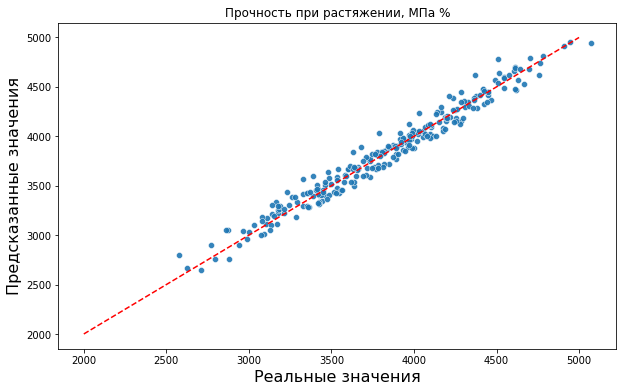

In [295]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.9)
line_X = np.linspace(2000, 5000, 5000)
line_Y = line_X
plt.plot(line_X, line_Y, 'r--')
plt.title("Прочность при растяжении, МПа %", fontsize=12)
plt.xlabel('Реальные значения', fontsize=16)
plt.ylabel('Предсказанные значения', fontsize=16)
plt.show()

## GradientBoostingRegressor

In [296]:
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
reg_r2 = r2_score(y_test, y_pred)
reg_mae = mean_absolute_error(y_test, y_pred)
reg_rmse = mean_squared_error(y_test, y_pred, squared=False)

print("---GradientBoostingRegressor---")
print("R2 score: "+str(reg_r2))
print("Mean Absolute Error: "+str(reg_mae))
print("Root Mean Squared Error: "+str(reg_rmse))

r2_scores["GradientBoostingRegressor"] = reg_r2
mae_scores["GradientBoostingRegressor"] = reg_mae
rmse_scores["GradientBoostingRegressor"] = reg_rmse

---GradientBoostingRegressor---
R2 score: 0.9175095810036573
Mean Absolute Error: 109.47299744589148
Root Mean Squared Error: 139.7706224769609


## RandomForestRegressor

In [297]:
rforest_reg = RandomForestRegressor()
rforest_reg.fit(X_train, y_train)

y_pred = rforest_reg.predict(X_test)

rforest_r2 = r2_score(y_test, y_pred)
rforest_mae = mean_absolute_error(y_test, y_pred)
rforest_rmse = mean_squared_error(y_test, y_pred, squared=False)
print("---RANDOM FOREST REGRESSOR---")
print("R2 score: "+str(rforest_r2))
print("Mean Absolute Error: "+str(rforest_mae))
print("Root Mean Squared Error: "+str(rforest_rmse))

r2_scores["random_forest"] = rforest_r2
mae_scores["random_forest"] = rforest_mae
rmse_scores["random_forest"] = rforest_rmse

---RANDOM FOREST REGRESSOR---
R2 score: 0.8572373732138482
Mean Absolute Error: 143.91190490557477
Root Mean Squared Error: 183.87445973380628


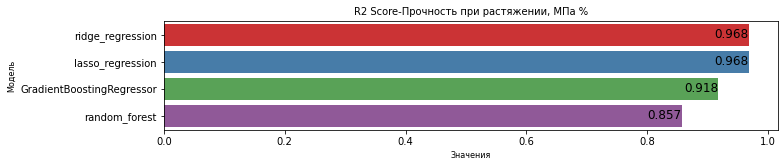

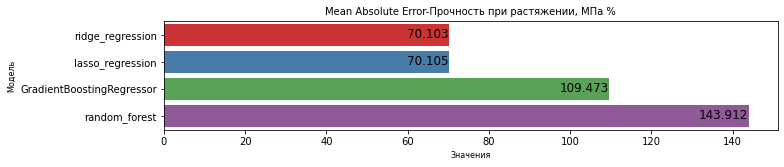

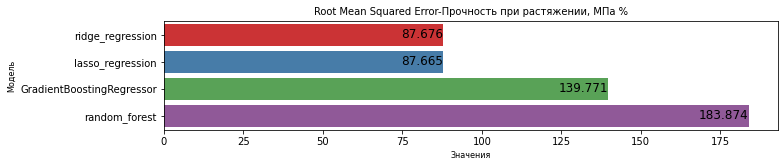

In [298]:
#Визуализация ошибок и метрик всех моделей
scores = [r2_scores, mae_scores, rmse_scores]
titles = ['R2 Score-Прочность при растяжении, МПа %', 'Mean Absolute Error-Прочность при растяжении, МПа %', 'Root Mean Squared Error-Прочность при растяжении, МПа %']

for i in range(len(scores)):
    plt.figure(figsize=(11, 2))
    graph = sns.barplot(x=list(scores[i].values()), y=list(
        scores[i].keys()), palette="Set1")
    plt.title(titles[i], fontsize=10)
    plt.xlabel("Значения", fontsize=8)
    plt.ylabel("Модель", fontsize=8)
   
    for p in graph.patches:
        if not math.isnan(p.get_width()):
            x = p.get_width() - graph.patches[0].get_width()*0
            y = p.get_y() + p.get_height() - 0.3
            value = round(p.get_width(), 3)
            graph.text(x, y, value, ha="right", color='black', size='large')    
    plt.show()
   

#### Использовалась Tensorflow Keras, для целей обучения я буду тестировать линейную регрессию и регрессию DNN , которая содержит информацию о различных компонентах  с целью определения соотношение матрица-наполнитель %.

In [299]:
df_dnn = df_actual.drop(['Тотал'], axis=1)

In [300]:
train = df_dnn.sample(frac=0.8, random_state= 42)
test = df_dnn.drop(train.index)

In [301]:
##Разделим данные на обучающие и тестовые  выборки, а затем отделим объекты от целевой переменной

In [302]:
train_features = train.copy()
test_features = test.copy()

train_labels = train_features.pop('Соотношение матрица-наполнитель %')
test_labels = test_features.pop('Соотношение матрица-наполнитель %')

print(train_labels.head(), test_labels.head(), train_features.head(), test_features.head())

98     2.943685
548    3.591091
263    4.809635
280    5.929988
956    4.065195
Name: Соотношение матрица-наполнитель %, dtype: float64 23    3.632997
27    4.756192
36    4.297328
38    3.562219
46    2.893226
Name: Соотношение матрица-наполнитель %, dtype: float64      Плотность, кг/м3 %  модуль упругости, ГПа %  \
98          2710.766378              1240.075911   
548         2929.084772              1358.388153   
263         3040.903272              1249.836033   
280         3232.879561               668.004878   
956         2626.810599               668.896851   

     Количество отвердителя, м.% %  Содержание эпоксидных групп,%_2 %  \
98                      197.510157                          28.792975   
548                     153.638642                          30.307423   
263                     140.374501                          35.153481   
280                     211.461515                          39.764013   
956                     230.164134                     

In [303]:
train_features.describe().transpose()[['mean', 'std']]

mean         std
Плотность, кг/м3 %                      3051.405030  293.053512
модуль упругости, ГПа %                 1127.631522  447.943521
Количество отвердителя, м.% %            171.584799   43.441225
Содержание эпоксидных групп,%_2 %         34.339894    4.837595
Температура вспышки, С_2 %               442.095366   71.087405
Поверхностная плотность, г/м2 %          724.401164  396.280605
Модуль упругости при растяжении, ГПа %   113.183044   11.083098
Прочность при растяжении, МПа %         3822.066996  494.264998
Потребление смолы, г/м2 %                338.627929   89.245734
Угол нашивки, град %                      70.810129   69.499224
Шаг нашивки %                             10.537713    4.047396
Плотность нашивки %                       88.781579   18.538167

In [304]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

[[3051.405    1127.6315    171.58484    34.339893  442.0953    724.4011
   113.183044 3822.0674    338.62793    70.810135   10.537713   88.78158 ]]


In [305]:
print(train_features[:1])
print(normalizer(np.array(train_features[:2])).numpy())

    Плотность, кг/м3 %  модуль упругости, ГПа %  \
98         2710.766378              1240.075911   

    Количество отвердителя, м.% %  Содержание эпоксидных групп,%_2 %  \
98                     197.510157                          28.792975   

    Температура вспышки, С_2 %  Поверхностная плотность, г/м2 %  \
98                  428.865652                       486.775966   

    Модуль упругости при растяжении, ГПа %  Прочность при растяжении, МПа %  \
98                               95.303293                      4490.641453   

    Потребление смолы, г/м2 %  Угол нашивки, град %  Шаг нашивки %  \
98                 240.998437                   0.0       1.987122   

    Плотность нашивки %  
98            75.338969  
[[-1.1632289   0.25120774  0.59722817 -1.1474677  -0.18624029 -0.6000781
  -1.6144273   1.3536547  -1.0947417  -1.019609   -2.1141639  -0.72566307]
 [-0.41770515  0.5155245  -0.4134172  -0.83418024  0.5276926   0.57909006
   0.12162412 -0.5952916  -1.1549599   0.83

### Линейная регрессия


##### Будет использоваться последовательная модель

In [306]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
]) 

In [307]:
linear_model.predict(train_features) 

array([[ 4.97782767e-01],
       [-1.38685083e+00],
       [-6.81690425e-02],
       [ 1.30477262e+00],
       [ 2.49154717e-01],
       [-7.21547246e-01],
       [-5.37272453e-01],
       [ 7.78746068e-01],
       [ 7.40277290e-01],
       [-4.90000874e-01],
       [-6.40334308e-01],
       [-7.87588239e-01],
       [-9.46642518e-01],
       [ 8.06696892e-01],
       [ 1.24881554e+00],
       [ 4.38531935e-02],
       [-1.60142064e+00],
       [-1.21777439e+00],
       [-1.47387683e-01],
       [ 5.68498671e-01],
       [ 1.47208059e+00],
       [ 2.29069114e-01],
       [-1.31068254e+00],
       [-7.47413218e-01],
       [ 2.58045554e-01],
       [ 6.33210897e-01],
       [ 1.21641517e-01],
       [-3.75347286e-01],
       [ 8.01798642e-01],
       [-9.92733359e-01],
       [-9.89658892e-01],
       [-3.90222073e-02],
       [ 3.72878313e-02],
       [-1.52389383e+00],
       [ 3.71869087e-01],
       [ 3.38802218e-01],
       [ 7.61934459e-01],
       [-1.17734328e-01],
       [ 1.0

In [308]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')###Использование алгоритма оптимизации Adam для обновления весов сети

In [309]:
history = linear_model.fit(
    train_features, train_labels, 
    epochs=25,
    verbose=1,
    validation_split = 0.2)

Epoch 1/25
18/18 [==============================] - 0s 7ms/step - loss: 3.8437 - val_loss: 2.9818
Epoch 2/25
18/18 [==============================] - 0s 2ms/step - loss: 2.2050 - val_loss: 1.5303
Epoch 3/25
18/18 [==============================] - 0s 3ms/step - loss: 1.3430 - val_loss: 1.2214
Epoch 4/25
18/18 [==============================] - 0s 2ms/step - loss: 1.2098 - val_loss: 1.2518
Epoch 5/25
18/18 [==============================] - 0s 3ms/step - loss: 1.1877 - val_loss: 1.1853
Epoch 6/25
18/18 [==============================] - 0s 3ms/step - loss: 1.2066 - val_loss: 1.1921
Epoch 7/25
18/18 [==============================] - 0s 2ms/step - loss: 1.2208 - val_loss: 1.2261
Epoch 8/25
18/18 [==============================] - 0s 2ms/step - loss: 1.1801 - val_loss: 1.1508
Epoch 9/25
18/18 [==============================] - 0s 2ms/step - loss: 1.2267 - val_loss: 1.1857
Epoch 10/25
18/18 [==============================] - 0s 2ms/step - loss: 1.1899 - val_loss: 1.2248
Epoch 11/25
18/18 [

In [310]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

loss  val_loss  epoch
20  1.252088  1.251248     20
21  1.218907  1.317321     21
22  1.228535  1.088708     22
23  1.212501  1.187541     23
24  1.200715  1.224084     24

In [311]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 3])
    plt.xlabel('Эпоха')
    plt.ylabel('MAE [Соотношение матрица-наполнитель %]')
    plt.legend()
    plt.grid(True)

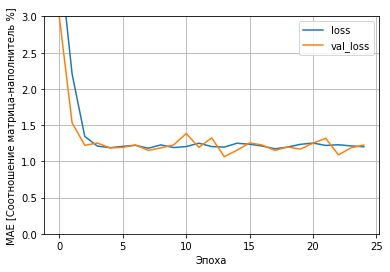

In [312]:
plot_loss(history)

In [313]:
test_results = {}
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

In [314]:
test_results

{'linear_model': 1.0389267206192017}

### DNN Regression

In [315]:
model = keras.Sequential([
      normalizer,
      layers.Dense(64,activation='sigmoid'),
      layers.Dropout(0.5),
      layers.Dense(32, activation='sigmoid'),
      layers.Dense(1)
  ]) 

model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001))

In [316]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 12)               25        
 ion)                                                            
                                                                 
 dense_61 (Dense)            (None, 64)                832       
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_62 (Dense)            (None, 32)                2080      
                                                                 
 dense_63 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,970
Trainable params: 2,945
Non-trainable params: 25
__________________________________________________

In [317]:
history = model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=1, epochs=100)

Epoch 1/100
18/18 [==============================] - 0s 8ms/step - loss: 5.8296 - val_loss: 5.1518
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 4.6632 - val_loss: 4.0447
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 3.7029 - val_loss: 3.2098
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 2.9729 - val_loss: 2.6299
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 2.4526 - val_loss: 2.2193
Epoch 6/100
18/18 [==============================] - 0s 3ms/step - loss: 2.0872 - val_loss: 1.9074
Epoch 7/100
18/18 [==============================] - 0s 3ms/step - loss: 1.7996 - val_loss: 1.6766
Epoch 8/100
18/18 [==============================] - 0s 3ms/step - loss: 1.5805 - val_loss: 1.4890
Epoch 9/100
18/18 [==============================] - 0s 3ms/step - loss: 1.4293 - val_loss: 1.3433
Epoch 10/100
18/18 [==============================] - 0s 2ms/step - loss: 1.3213 - val_loss: 1.2526
Epoch 11/

18/18 [==============================] - 0s 2ms/step - loss: 1.1476 - val_loss: 1.1690
Epoch 84/100
18/18 [==============================] - 0s 3ms/step - loss: 1.1496 - val_loss: 1.1701
Epoch 85/100
18/18 [==============================] - 0s 3ms/step - loss: 1.1414 - val_loss: 1.1700
Epoch 86/100
18/18 [==============================] - 0s 3ms/step - loss: 1.1484 - val_loss: 1.1706
Epoch 87/100
18/18 [==============================] - 0s 3ms/step - loss: 1.1486 - val_loss: 1.1728
Epoch 88/100
18/18 [==============================] - 0s 3ms/step - loss: 1.1461 - val_loss: 1.1738
Epoch 89/100
18/18 [==============================] - 0s 3ms/step - loss: 1.1537 - val_loss: 1.1762
Epoch 90/100
18/18 [==============================] - 0s 2ms/step - loss: 1.1347 - val_loss: 1.1729
Epoch 91/100
18/18 [==============================] - 0s 2ms/step - loss: 1.1483 - val_loss: 1.1709
Epoch 92/100
18/18 [==============================] - 0s 2ms/step - loss: 1.1484 - val_loss: 1.1725
Epoch 93/100


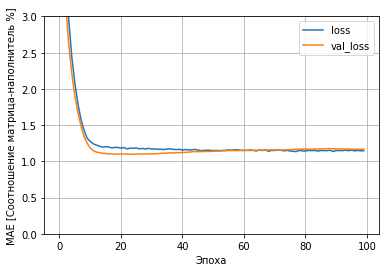

In [318]:
plot_loss(history)

In [319]:
test_results['dnn_model'] = model.evaluate(test_features, test_labels, verbose=0)

In [320]:
test_results 

{'linear_model': 1.0389267206192017, 'dnn_model': 1.0319396257400513}

In [321]:
pd.DataFrame(test_results, index=['Mean absolute error [Соотношение матрица-наполнитель %]']).T

Mean absolute error [Соотношение матрица-наполнитель %]
linear_model                                           1.038927      
dnn_model                                              1.031940

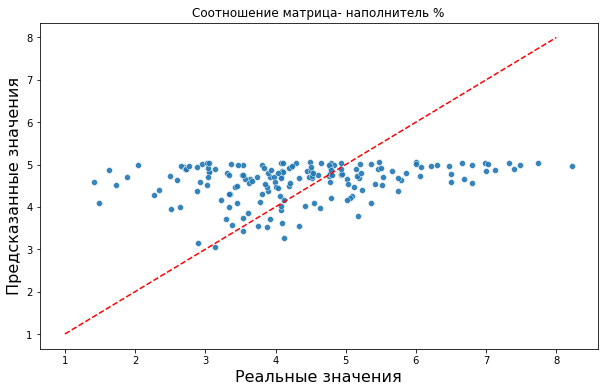

In [322]:
test_predictions = model.predict(test_features).flatten()
plt.figure(figsize=(10, 6))
sns.scatterplot(x=test_labels, y=test_predictions, alpha=0.9)
line_X = np.linspace(1, 8, 8)
line_Y = line_X
plt.plot(line_X, line_Y, 'r--')
plt.title("Соотношение матрица- наполнитель %", fontsize=12)
plt.xlabel('Реальные значения', fontsize=16)
plt.ylabel('Предсказанные значения', fontsize=16)
plt.show()

### Доп нейронная сеть прогноза "Прочность при растяжении, Мпа %"

In [323]:
train = df_dnn.sample(frac=0.8, random_state= 42)
test = df_dnn.drop(train.index)

train_features = train.copy()
test_features = test.copy()

train_labels = train_features.pop('Прочность при растяжении, МПа %')
test_labels = test_features.pop('Прочность при растяжении, МПа %')

print(train_labels.head(), test_labels.head(), train_features.head(), test_features.head())

98     4490.641453
548    3528.051081
263    3355.071936
280    4002.320526
956    4747.045670
Name: Прочность при растяжении, МПа %, dtype: float64 23    3632.990221
27    4401.510614
36    3351.707781
38    3993.694920
46    4216.209157
Name: Прочность при растяжении, МПа %, dtype: float64      Соотношение матрица-наполнитель %  Плотность, кг/м3 %  \
98                            2.943685         2710.766378   
548                           3.591091         2929.084772   
263                           4.809635         3040.903272   
280                           5.929988         3232.879561   
956                           4.065195         2626.810599   

     модуль упругости, ГПа %  Количество отвердителя, м.% %  \
98               1240.075911                     197.510157   
548              1358.388153                     153.638642   
263              1249.836033                     140.374501   
280               668.004878                     211.461515   
956               6

In [324]:
model = keras.Sequential([
      normalizer,
      layers.Dense(64,activation='relu'),
      layers.Dense(28, activation='relu'),
      layers.Dense(12, activation='relu'),
      layers.Dense(1)
  ]) 

model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001))

In [325]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 12)               25        
 ion)                                                            
                                                                 
 dense_64 (Dense)            (None, 64)                832       
                                                                 
 dense_65 (Dense)            (None, 28)                1820      
                                                                 
 dense_66 (Dense)            (None, 12)                348       
                                                                 
 dense_67 (Dense)            (None, 1)                 13        
                                                                 
Total params: 3,038
Trainable params: 3,013
Non-trainable params: 25
__________________________________________________

In [326]:
history = model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=1, epochs=200)

Epoch 1/200
18/18 [==============================] - 0s 8ms/step - loss: 3811.0437 - val_loss: 3804.5684
Epoch 2/200
18/18 [==============================] - 0s 3ms/step - loss: 3785.2078 - val_loss: 3772.6907
Epoch 3/200
18/18 [==============================] - 0s 3ms/step - loss: 3739.1150 - val_loss: 3705.0618
Epoch 4/200
18/18 [==============================] - 0s 2ms/step - loss: 3639.4841 - val_loss: 3563.5010
Epoch 5/200
18/18 [==============================] - 0s 3ms/step - loss: 3435.2549 - val_loss: 3284.6931
Epoch 6/200
18/18 [==============================] - 0s 3ms/step - loss: 3051.5669 - val_loss: 2770.3352
Epoch 7/200
18/18 [==============================] - 0s 3ms/step - loss: 2359.0200 - val_loss: 1895.8655
Epoch 8/200
18/18 [==============================] - 0s 3ms/step - loss: 1426.5789 - val_loss: 1065.1702
Epoch 9/200
18/18 [==============================] - 0s 3ms/step - loss: 1050.6998 - val_loss: 962.6154
Epoch 10/200
18/18 [==============================] - 0s

18/18 [==============================] - 0s 3ms/step - loss: 246.2163 - val_loss: 225.6307
Epoch 80/200
18/18 [==============================] - 0s 2ms/step - loss: 242.4178 - val_loss: 217.3681
Epoch 81/200
18/18 [==============================] - 0s 2ms/step - loss: 239.4771 - val_loss: 216.6636
Epoch 82/200
18/18 [==============================] - 0s 2ms/step - loss: 238.4560 - val_loss: 224.6745
Epoch 83/200
18/18 [==============================] - 0s 2ms/step - loss: 240.6294 - val_loss: 216.6012
Epoch 84/200
18/18 [==============================] - 0s 3ms/step - loss: 235.8051 - val_loss: 212.7131
Epoch 85/200
18/18 [==============================] - 0s 3ms/step - loss: 234.5960 - val_loss: 223.7808
Epoch 86/200
18/18 [==============================] - 0s 3ms/step - loss: 245.0744 - val_loss: 214.3608
Epoch 87/200
18/18 [==============================] - 0s 3ms/step - loss: 232.8044 - val_loss: 221.5911
Epoch 88/200
18/18 [==============================] - 0s 2ms/step - loss: 233

18/18 [==============================] - 0s 2ms/step - loss: 157.2511 - val_loss: 148.2545
Epoch 158/200
18/18 [==============================] - 0s 3ms/step - loss: 157.2159 - val_loss: 145.6789
Epoch 159/200
18/18 [==============================] - 0s 2ms/step - loss: 156.0217 - val_loss: 139.6951
Epoch 160/200
18/18 [==============================] - 0s 3ms/step - loss: 152.9213 - val_loss: 153.5026
Epoch 161/200
18/18 [==============================] - 0s 3ms/step - loss: 153.5605 - val_loss: 141.1093
Epoch 162/200
18/18 [==============================] - 0s 3ms/step - loss: 153.2655 - val_loss: 139.0026
Epoch 163/200
18/18 [==============================] - 0s 3ms/step - loss: 148.9655 - val_loss: 138.2273
Epoch 164/200
18/18 [==============================] - 0s 3ms/step - loss: 152.8921 - val_loss: 135.4392
Epoch 165/200
18/18 [==============================] - 0s 3ms/step - loss: 147.3147 - val_loss: 138.9395
Epoch 166/200
18/18 [==============================] - 0s 2ms/step - 

In [327]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([100, 3900])
    plt.xlabel('Эпоха')
    plt.ylabel('MAE [Прочность при растяжении, МПа %]')
    plt.legend()
    plt.grid(True)

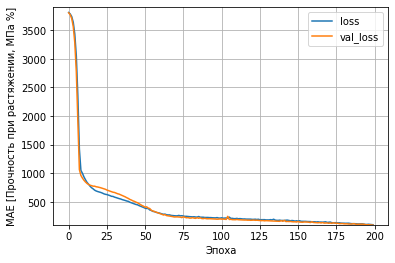

In [328]:
plot_loss(history)

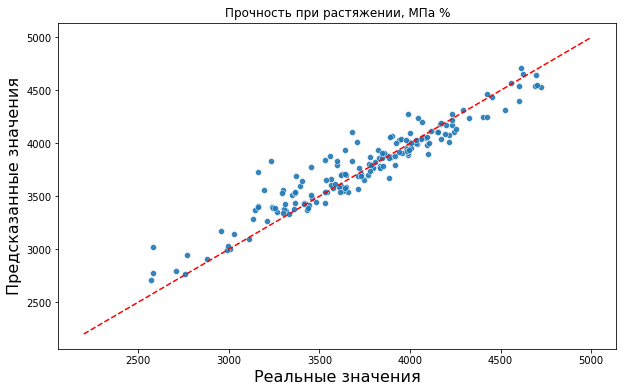

In [329]:
test_predictions = model.predict(test_features).flatten()
plt.figure(figsize=(10, 6))
sns.scatterplot(x=test_labels, y=test_predictions, alpha=0.9)
line_X = np.linspace(2200, 5000, 5000)
line_Y = line_X
plt.plot(line_X, line_Y, 'r--')
plt.title("Прочность при растяжении, МПа %", fontsize=12)
plt.xlabel('Реальные значения', fontsize=16)
plt.ylabel('Предсказанные значения', fontsize=16)
plt.show()